In [1]:
#Notebook to make plots for the sensitivity tests that Jeff ran, 
#adapted from Jeff's Matlab scripts, from loading
#mat files saved by those.

#Started 14 December 2020

In [2]:
#2 types of plots, each with 2 versions: 
#1 with all results for V1, 
#1 with V1 and V2 results side-by-side for the subset of experiments that included V2. 

# First is the "matrix" plot of standard error vs. observations. (superseded in later scripts)
# 2nd is line plots showing how the different values of each parameter affect different variables.

In [3]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.io #For loading .mat file
from scipy.stats import iqr

In [4]:
#Load the mat files
OBS_RMSEs = scipy.io.loadmat('mat_from_Jeff/OBS_RMSEs.mat')
OBS_RMSEsv2 = scipy.io.loadmat('mat_from_Jeff/OBS_RMSEsv2.mat')

SensTest_v1 = scipy.io.loadmat('mat_from_Jeff/JS_C180_ParamSensTest.mat')
SensTest_v2 = scipy.io.loadmat('mat_from_Jeff/JS_C180v2_ParamSensTest.mat')

#Non-normalized versions for V1-V2 comparison
NN_RMSEs = scipy.io.loadmat('mat_from_Jeff/JS_C180_ObsRMSEs_NonNormalized.mat')
NN_RMSEsv2 = scipy.io.loadmat('mat_from_Jeff/JS_C180v2_ObsRMSEs_NonNormalized.mat')

/opt/sw/anaconda3/envs/pangeoxtd36/lib/python3.6/site-packages/scipy/io/matlab/mio.py:224: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


In [5]:

#####   DATA EXPLORATION   #####


In [6]:
print(SensTest_v1.keys())

dict_keys(['__header__', '__version__', '__globals__', 'AREA', 'CLD_De_m', 'CLD_De_s', 'CLD_Dflt_m', 'CLD_Dflt_s', 'CLD_Di_m', 'CLD_Di_s', 'CLD_Ds_m', 'CLD_Ds_s', 'CLD_Ec_m', 'CLD_Ec_s', 'CLD_En090De_m', 'CLD_En090De_s', 'CLD_En090Di_m', 'CLD_En090Di_s', 'CLD_En090Ds_m', 'CLD_En090Ds_s', 'CLD_En090Ec_m', 'CLD_En090Ec_s', 'CLD_En_m', 'CLD_En_s', 'CLS_De_m', 'CLS_De_s', 'CLS_Dflt_m', 'CLS_Dflt_s', 'CLS_Di_m', 'CLS_Di_s', 'CLS_Ds_m', 'CLS_Ds_s', 'CLS_Ec_m', 'CLS_Ec_s', 'CLS_En090De_m', 'CLS_En090De_s', 'CLS_En090Di_m', 'CLS_En090Di_s', 'CLS_En090Ds_m', 'CLS_En090Ds_s', 'CLS_En090Ec_m', 'CLS_En090Ec_s', 'CLS_En_m', 'CLS_En_s', 'COUNTS_De', 'COUNTS_Dflt', 'COUNTS_Di', 'COUNTS_Ds', 'COUNTS_Ec', 'COUNTS_En', 'COUNTS_En090De', 'COUNTS_En090Di', 'COUNTS_En090Ds', 'COUNTS_En090Ec', 'GMST_De_m', 'GMST_De_s', 'GMST_Dflt_m', 'GMST_Dflt_s', 'GMST_Di_m', 'GMST_Di_s', 'GMST_Ds_m', 'GMST_Ds_s', 'GMST_Ec_m', 'GMST_Ec_s', 'GMST_En090De_m', 'GMST_En090De_s', 'GMST_En090Di_m', 'GMST_En090Di_s', 'GMST_En090

In [7]:
print(OBS_RMSEs.keys())

dict_keys(['__header__', '__version__', '__globals__', 'CERES_OAFLUX_qnet_RMSE', 'CERES_lwTOA_RMSE', 'CERES_swTOA_RMSE', 'CMAP_EHD_precip_RMSE', 'CMAP_STD_precip_RMSE', 'CRUTEM_EHD_tsurf_RMSE', 'CRUTEM_STD_tsurf_RMSE', 'ERA_I_200u_RMSE', 'ERA_I_200v_RMSE', 'ERA_I_500z_RMSE', 'ERA_I_850u_RMSE', 'ERA_I_850v_RMSE', 'ERA_I_slp_RMSE', 'ERA_I_zonQ_RMSE', 'ERA_I_zonT_RMSE', 'ERA_I_zonU_RMSE', 'ERA_I_zonV_RMSE', 'GPCP_precip_RMSE', 'IBTRACS_genDen_RMSE', 'IBTRACS_trackDen_RMSE', 'ICOADS_slp_RMSE', 'ICOADS_uStress_RMSE', 'ICOADS_vStress_RMSE', 'ISCCP_OAFLUX_qnet_RMSE', 'ISCCP_cldOptDep_RMSE', 'NSIDC_snow_RMSE', 'RMSE', 'RMSE_sum', 'None', 'c', 'cmap_std', 'data', 'f', 'fID', 'fname', 'header', 'hyam', 'hybm', 'index', 'landmask', 'n', 'oceanmask', 'oname', 'years', '__function_workspace__'])


In [8]:
print(OBS_RMSEsv2.keys())

dict_keys(['__header__', '__version__', '__globals__', 'CERES_OAFLUX_qnet_RMSE', 'CERES_lwTOA_RMSE', 'CERES_swTOA_RMSE', 'CMAP_EHD_precip_RMSE', 'CMAP_STD_precip_RMSE', 'CRUTEM_EHD_tsurf_RMSE', 'CRUTEM_STD_tsurf_RMSE', 'ERA_I_200u_RMSE', 'ERA_I_200v_RMSE', 'ERA_I_500z_RMSE', 'ERA_I_850u_RMSE', 'ERA_I_850v_RMSE', 'ERA_I_slp_RMSE', 'ERA_I_zonQ_RMSE', 'ERA_I_zonT_RMSE', 'ERA_I_zonU_RMSE', 'ERA_I_zonV_RMSE', 'GPCP_precip_RMSE', 'IBTRACS_genDen_RMSE', 'IBTRACS_trackDen_RMSE', 'ICOADS_slp_RMSE', 'ICOADS_uStress_RMSE', 'ICOADS_vStress_RMSE', 'ISCCP_OAFLUX_qnet_RMSE', 'ISCCP_cldOptDep_RMSE', 'NSIDC_snow_RMSE', 'RMSE', 'RMSE_sum', 'None', 'c', 'cmap_std', 'data', 'f', 'fID', 'fname', 'header', 'hyam', 'hybm', 'index', 'landmask', 'n', 'oceanmask', 'oname', 'years', '__function_workspace__'])


In [9]:
print(NN_RMSEs.keys())

dict_keys(['__header__', '__version__', '__globals__', 'CERES_OAFLUX_qnet_RMSE', 'CERES_lwTOA_RMSE', 'CERES_swTOA_RMSE', 'CMAP_EHD_precip_RMSE', 'CMAP_STD_precip_RMSE', 'CRUTEM_EHD_tsurf_RMSE', 'CRUTEM_STD_tsurf_RMSE', 'ERA_I_200u_RMSE', 'ERA_I_200v_RMSE', 'ERA_I_500z_RMSE', 'ERA_I_850u_RMSE', 'ERA_I_850v_RMSE', 'ERA_I_slp_RMSE', 'ERA_I_zonQ_RMSE', 'ERA_I_zonT_RMSE', 'ERA_I_zonU_RMSE', 'ERA_I_zonV_RMSE', 'GPCP_precip_RMSE', 'IBTRACS_genDen_RMSE', 'IBTRACS_trackDen_RMSE', 'ICOADS_slp_RMSE', 'ICOADS_uStress_RMSE', 'ICOADS_vStress_RMSE', 'ISCCP_OAFLUX_qnet_RMSE', 'ISCCP_cldOptDep_RMSE', 'NSIDC_snow_RMSE', 'c', 'cmap_std', 'data', 'f', 'fID', 'fname', 'header', 'hyam', 'hybm', 'landmask', 'n', 'oceanmask', 'oname', 'years'])


In [10]:
print(NN_RMSEs['ERA_I_500z_RMSE'])
print(NN_RMSEs['ERA_I_500z_RMSE'][:,0])

[[37.76455948]
 [42.94711993]
 [36.83293159]
 [28.38376507]
 [37.72879311]]
[37.76455948 42.94711993 36.83293159 28.38376507 37.72879311]


In [11]:
print(OBS_RMSEs['RMSE'])

[[ 0.89812236  1.15049724  1.04879617 ...  1.07852775  0.36252812
  -0.22168828]
 [-0.75634811 -0.74028879 -0.71564417 ... -0.44519949  0.19481818
  -0.63875856]
 [-0.61798597 -0.66836346 -0.61757283 ... -0.68986923 -0.49108332
   0.07727057]
 ...
 [ 0.61134234  0.49174693  0.58483873 ... -0.19210898  1.25328288
   1.05165258]
 [ 0.4993997   0.459105    0.50405338 ... -0.09728503 -0.94922309
   0.85549575]
 [ 0.95445297  0.90444611  0.93007159 ...  1.13027051  0.86504636
   1.52148462]]


In [12]:
print(SensTest_v1['xaxis_Ec'])
print(SensTest_v1['xaxis_Ec'][0,:])
print(SensTest_v1['TOA_Dflt_m'])
print(SensTest_v1['TOA_Ec_m'])
print(np.append(SensTest_v1['TOA_Dflt_m'], 
                SensTest_v1['TOA_Ec_m']))
print(np.append([3,4,5], np.append([6], [7,8,9,10])))

[[0.2 0.4 0.5 0.6 0.7 0.8]]
[0.2 0.4 0.5 0.6 0.7 0.8]
[[-0.861643]]
[[-0.60958827]
 [-1.20661509]
 [-1.48487604]
 [-1.26787508]
 [-1.64209712]]
[-0.86164302 -0.60958827 -1.20661509 -1.48487604 -1.26787508 -1.64209712]
[ 3  4  5  6  7  8  9 10]


In [13]:
print(np.append(SensTest_v1['TOA_Dflt_m']-SensTest_v1['TOA_Dflt_s'], 
            SensTest_v1['TOA_Ec_m']-SensTest_v1['TOA_Ec_s']))
print(np.append(SensTest_v1['TOA_Dflt_m']+SensTest_v1['TOA_Dflt_s'], 
            SensTest_v1['TOA_Ec_m']+SensTest_v1['TOA_Ec_s']))

[-8.13598728 -7.89425433 -8.38503277 -8.42148912 -8.24647939 -8.63519394]
[6.41270161 6.6750778  5.97180259 5.45173705 5.71072924 5.35099971]


In [14]:
print(SensTest_v1['xaxis_En'])
#The default position (0.6) is at index 5 (starting at 0)

[[0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.85 0.9  0.95 0.97 0.99]]


In [15]:
print(SensTest_v2)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Dec 15 21:44:43 2020', '__version__': '1.0', '__globals__': [], 'AREA': array([[ 7.57944012, 46.3633728 , 67.43379211, ..., 67.43379211,
        46.3633728 ,  7.57944012],
       [ 7.57944012, 46.3633728 , 67.43379211, ..., 67.43379211,
        46.3633728 ,  7.57944012],
       [ 7.57944012, 46.3633728 , 67.43379211, ..., 67.43379211,
        46.3633728 ,  7.57944012],
       ...,
       [ 7.57944012, 46.3633728 , 67.43379211, ..., 67.43379211,
        46.3633728 ,  7.57944012],
       [ 7.57944012, 46.3633728 , 67.43379211, ..., 67.43379211,
        46.3633728 ,  7.57944012],
       [ 7.57944012, 46.3633728 , 67.43379211, ..., 67.43379211,
        46.3633728 ,  7.57944012]]), 'CLD_Dflt_m': array([[61.400974]], dtype=float32), 'CLD_Dflt_s': array([[1.0318283]], dtype=float32), 'CLD_Ec_m': array([[61.1656189 ],
       [60.98987198]]), 'CLD_Ec_s': array([[1.32212806],
       [1.18956792]]), 'CLD_En_m': array([[62.32

In [16]:

#####   For V1-V2 comparison: construct RMSE matrix and do normalization   #####


In [17]:
#Need 2D array where each row is a variable, column is 10 experiments: 5 from V1, 5 from V2. 

In [18]:
#First need the names of the variables in the order they will go in matching the existing plots.
exp_vars = ['GPCP_precip_RMSE', 
            'CMAP_STD_precip_RMSE', 
            'CMAP_EHD_precip_RMSE', 
            'ISCCP_cldOptDep_RMSE', 
            'ERA_I_slp_RMSE', 
            'ICOADS_slp_RMSE', 
            'CRUTEM_STD_tsurf_RMSE', 
            'CRUTEM_EHD_tsurf_RMSE', 
            'CERES_lwTOA_RMSE', 
            'CERES_swTOA_RMSE', 
            'ERA_I_850u_RMSE', 
            'ERA_I_850v_RMSE', 
            'ERA_I_200u_RMSE', 
            'ERA_I_200v_RMSE', 
            'ERA_I_500z_RMSE', 
            'ERA_I_zonT_RMSE', 
            'ICOADS_uStress_RMSE', 
            'ICOADS_vStress_RMSE', 
            'ERA_I_zonU_RMSE', 
            'ERA_I_zonV_RMSE', 
            'ISCCP_OAFLUX_qnet_RMSE', 
            'CERES_OAFLUX_qnet_RMSE', 
            'ERA_I_zonQ_RMSE', 
            'IBTRACS_genDen_RMSE', 
            'IBTRACS_trackDen_RMSE', 
            'NSIDC_snow_RMSE'
           ]

In [19]:
#Populate a 26x10 array with the non-normalized RMSEs 
RMSEs_v1v2_nonNorm = np.zeros([26,10])
for i in np.arange(26):
    RMSEs_v1v2_nonNorm[i,0:5] = NN_RMSEs[exp_vars[i]][:,0]
    RMSEs_v1v2_nonNorm[i,5:10] = NN_RMSEsv2[exp_vars[i]][:,0]

In [20]:
#print(RMSEs_v1v2_nonNorm)
#Now, divide each row by the IQR and then subtract the median
RMSEs_v1v2_IQR = iqr(RMSEs_v1v2_nonNorm, axis=1)
#print(RMSEs_v1v2_IQR)
RMSEs_v1v2_divIQR = RMSEs_v1v2_nonNorm/RMSEs_v1v2_IQR[:,None]
#print(RMSEs_v1v2_divIQR)
RMSEs_v1v2_norm = RMSEs_v1v2_divIQR - np.median(RMSEs_v1v2_divIQR, axis=1)[:,None]
#print(RMSEs_v1v2_norm)

#Looks right

In [21]:

#####   PLOTS: Sensitivity Test Line Graphs   #####


In [22]:
#Short functions to streamline portions of the plotting below

In [23]:
#(_m tag means mean, _s tag means standard deviation)
#(These are standard deviations across what variable? the 12 months?)
#(Latitudes, or longitudes?)
#What dimensions does Matlab nansum operate on? 
#And what was the order of the dimensions?
#Dimensions in the files Jeff read are time, lat, lon.
#He multiplies W/m^2 by area, adds them all up across lat/lon 
#then divides by Earth area. 
#Mean and standard deviation are across the 12 months, for 1990. 
#(Matlab documentation on sums is confusing, but for 2D returns 
# sum of each column--the 2nd dimension. Temperature e.g. would be
# off by 2 orders of magnitude if it was month instead, then 
# dividing by earth area.)

In [24]:
#4th row is convective fraction of CLOUD COVER, not rain.
#Actually ratio of convective to large-scale.

In [25]:
#What are the units of LWP, IWP? And is "cloud cover" cloud fraction? (Not sure)
#LWP: g/m^2
#IWP: g/m^2
#pcldt: TOTAL CLOUD COVER (%) 
#pmccld: CONVECTIVE CLOUD COVER (%)

In [26]:
#Max wind seems to be the highest wind seen in ANY TC.
#Must be units of m/s.

In [27]:
#For panels where the default value is on the left: 
#plot the values and scatterplot for the default
def plot_default_left(data_dict, xaxis_var, default_var, test_var, 
                      default_val, color='k', color_s='r'):
    plt.plot(data_dict[xaxis_var][0,:], 
         np.append(data_dict[default_var], data_dict[test_var]), 
         color=color, linewidth=3)
    plt.scatter(default_val, data_dict[default_var], marker='X', color=color_s, 
                s=150, zorder=10)
    
#Same for the "green" plots where default result is not a separate variable
#but selected from an array
def plot_default_left_green(data_dict, xaxis_var, default_result, test_var, 
                            default_val, color='g', color_s='m'):
    plt.plot(data_dict[xaxis_var][0,:], 
         np.append(default_result, data_dict[test_var]), 
         color=color, linewidth=3)
    plt.scatter(default_val, default_result, marker='X', color=color_s, 
                s=150, zorder=10)
    
#Fill in "error bar" regions, one standard deviation away from the mean
def plot_std_default_left(data_dict, xaxis_var, default_var_m, default_var_s, 
                          test_var_m, test_var_s, color='k', alpha=0.3):
    plt.fill_between(data_dict[xaxis_var][0,:], 
        np.append(data_dict[default_var_m]-data_dict[default_var_s], 
            data_dict[test_var_m]-data_dict[test_var_s]),
        np.append(data_dict[default_var_m]+data_dict[default_var_s], 
            data_dict[test_var_m]+data_dict[test_var_s]), 
        color=color, alpha=alpha)
    
#Same for the green one, again where default has to be selected from an array
def plot_std_default_left_green(data_dict, xaxis_var, default_result_m, default_result_s, 
                          test_var_m, test_var_s, color='g', alpha=0.3):
    plt.fill_between(data_dict[xaxis_var][0,:], 
        np.append(default_result_m-default_result_s, 
            data_dict[test_var_m]-data_dict[test_var_s]),
        np.append(default_result_m+default_result_s, 
            data_dict[test_var_m]+data_dict[test_var_s]), 
        color=color, alpha=alpha)
    

In [28]:
#For the 2nd column, the default value is in the middle. (Index 5 starting at 0) 
#Index -7 is the next one, 0.7 rather than 0.6
def plot_default_pos_5(data_dict, xaxis_var, default_var, test_var, 
                             default_val, color='k', color_s='r'):
    plt.plot(data_dict[xaxis_var][0,:], 
            np.append(data_dict[test_var][0:5], 
                np.append(data_dict[default_var], data_dict[test_var][-7:])), 
            color=color, linewidth=3)
    plt.scatter(default_val, data_dict[default_var], marker='X', color=color_s, 
                s=150, zorder=10)
    
#Standard deviation plot surrounding this
def plot_std_default_pos_5(data_dict,  xaxis_var, default_var_m, default_var_s, 
                          test_var_m, test_var_s, color='k', alpha=0.3):
    plt.fill_between(data_dict[xaxis_var][0,:], 
        np.append(data_dict[test_var_m][0:5]-data_dict[test_var_s][0:5], 
                np.append(data_dict[default_var_m]-data_dict[default_var_s], 
                          data_dict[test_var_m][-7:]-data_dict[test_var_s][-7:])), 
        np.append(data_dict[test_var_m][0:5]+data_dict[test_var_s][0:5], 
                np.append(data_dict[default_var_m]+data_dict[default_var_s], 
                          data_dict[test_var_m][-7:]+data_dict[test_var_s][-7:])), 
        color=color, alpha=alpha)

In [29]:
#Same for when the default is in the middle of 3 positions
def plot_default_middle_3(data_dict, xaxis_var, default_var, test_var, 
                             default_val, color='k', color_s='r'):
    plt.plot(data_dict[xaxis_var][0,:], 
            np.append(data_dict[test_var][0], 
                np.append(data_dict[default_var], data_dict[test_var][1])), 
            color=color, linewidth=3)
    plt.scatter(default_val, data_dict[default_var], marker='X', color=color_s, 
                s=150, zorder=10)
    
#Standard deviation plot surrounding this
def plot_std_default_middle_3(data_dict,  xaxis_var, default_var_m, default_var_s, 
                          test_var_m, test_var_s, color='k', alpha=0.3):
    plt.fill_between(data_dict[xaxis_var][0,:], 
        np.append(data_dict[test_var_m][0]-data_dict[test_var_s][0], 
                np.append(data_dict[default_var_m]-data_dict[default_var_s], 
                          data_dict[test_var_m][1]-data_dict[test_var_s][1])), 
        np.append(data_dict[test_var_m][0]+data_dict[test_var_s][0],
                np.append(data_dict[default_var_m]+data_dict[default_var_s], 
                          data_dict[test_var_m][1]+data_dict[test_var_s][1])), 
        color=color, alpha=alpha)

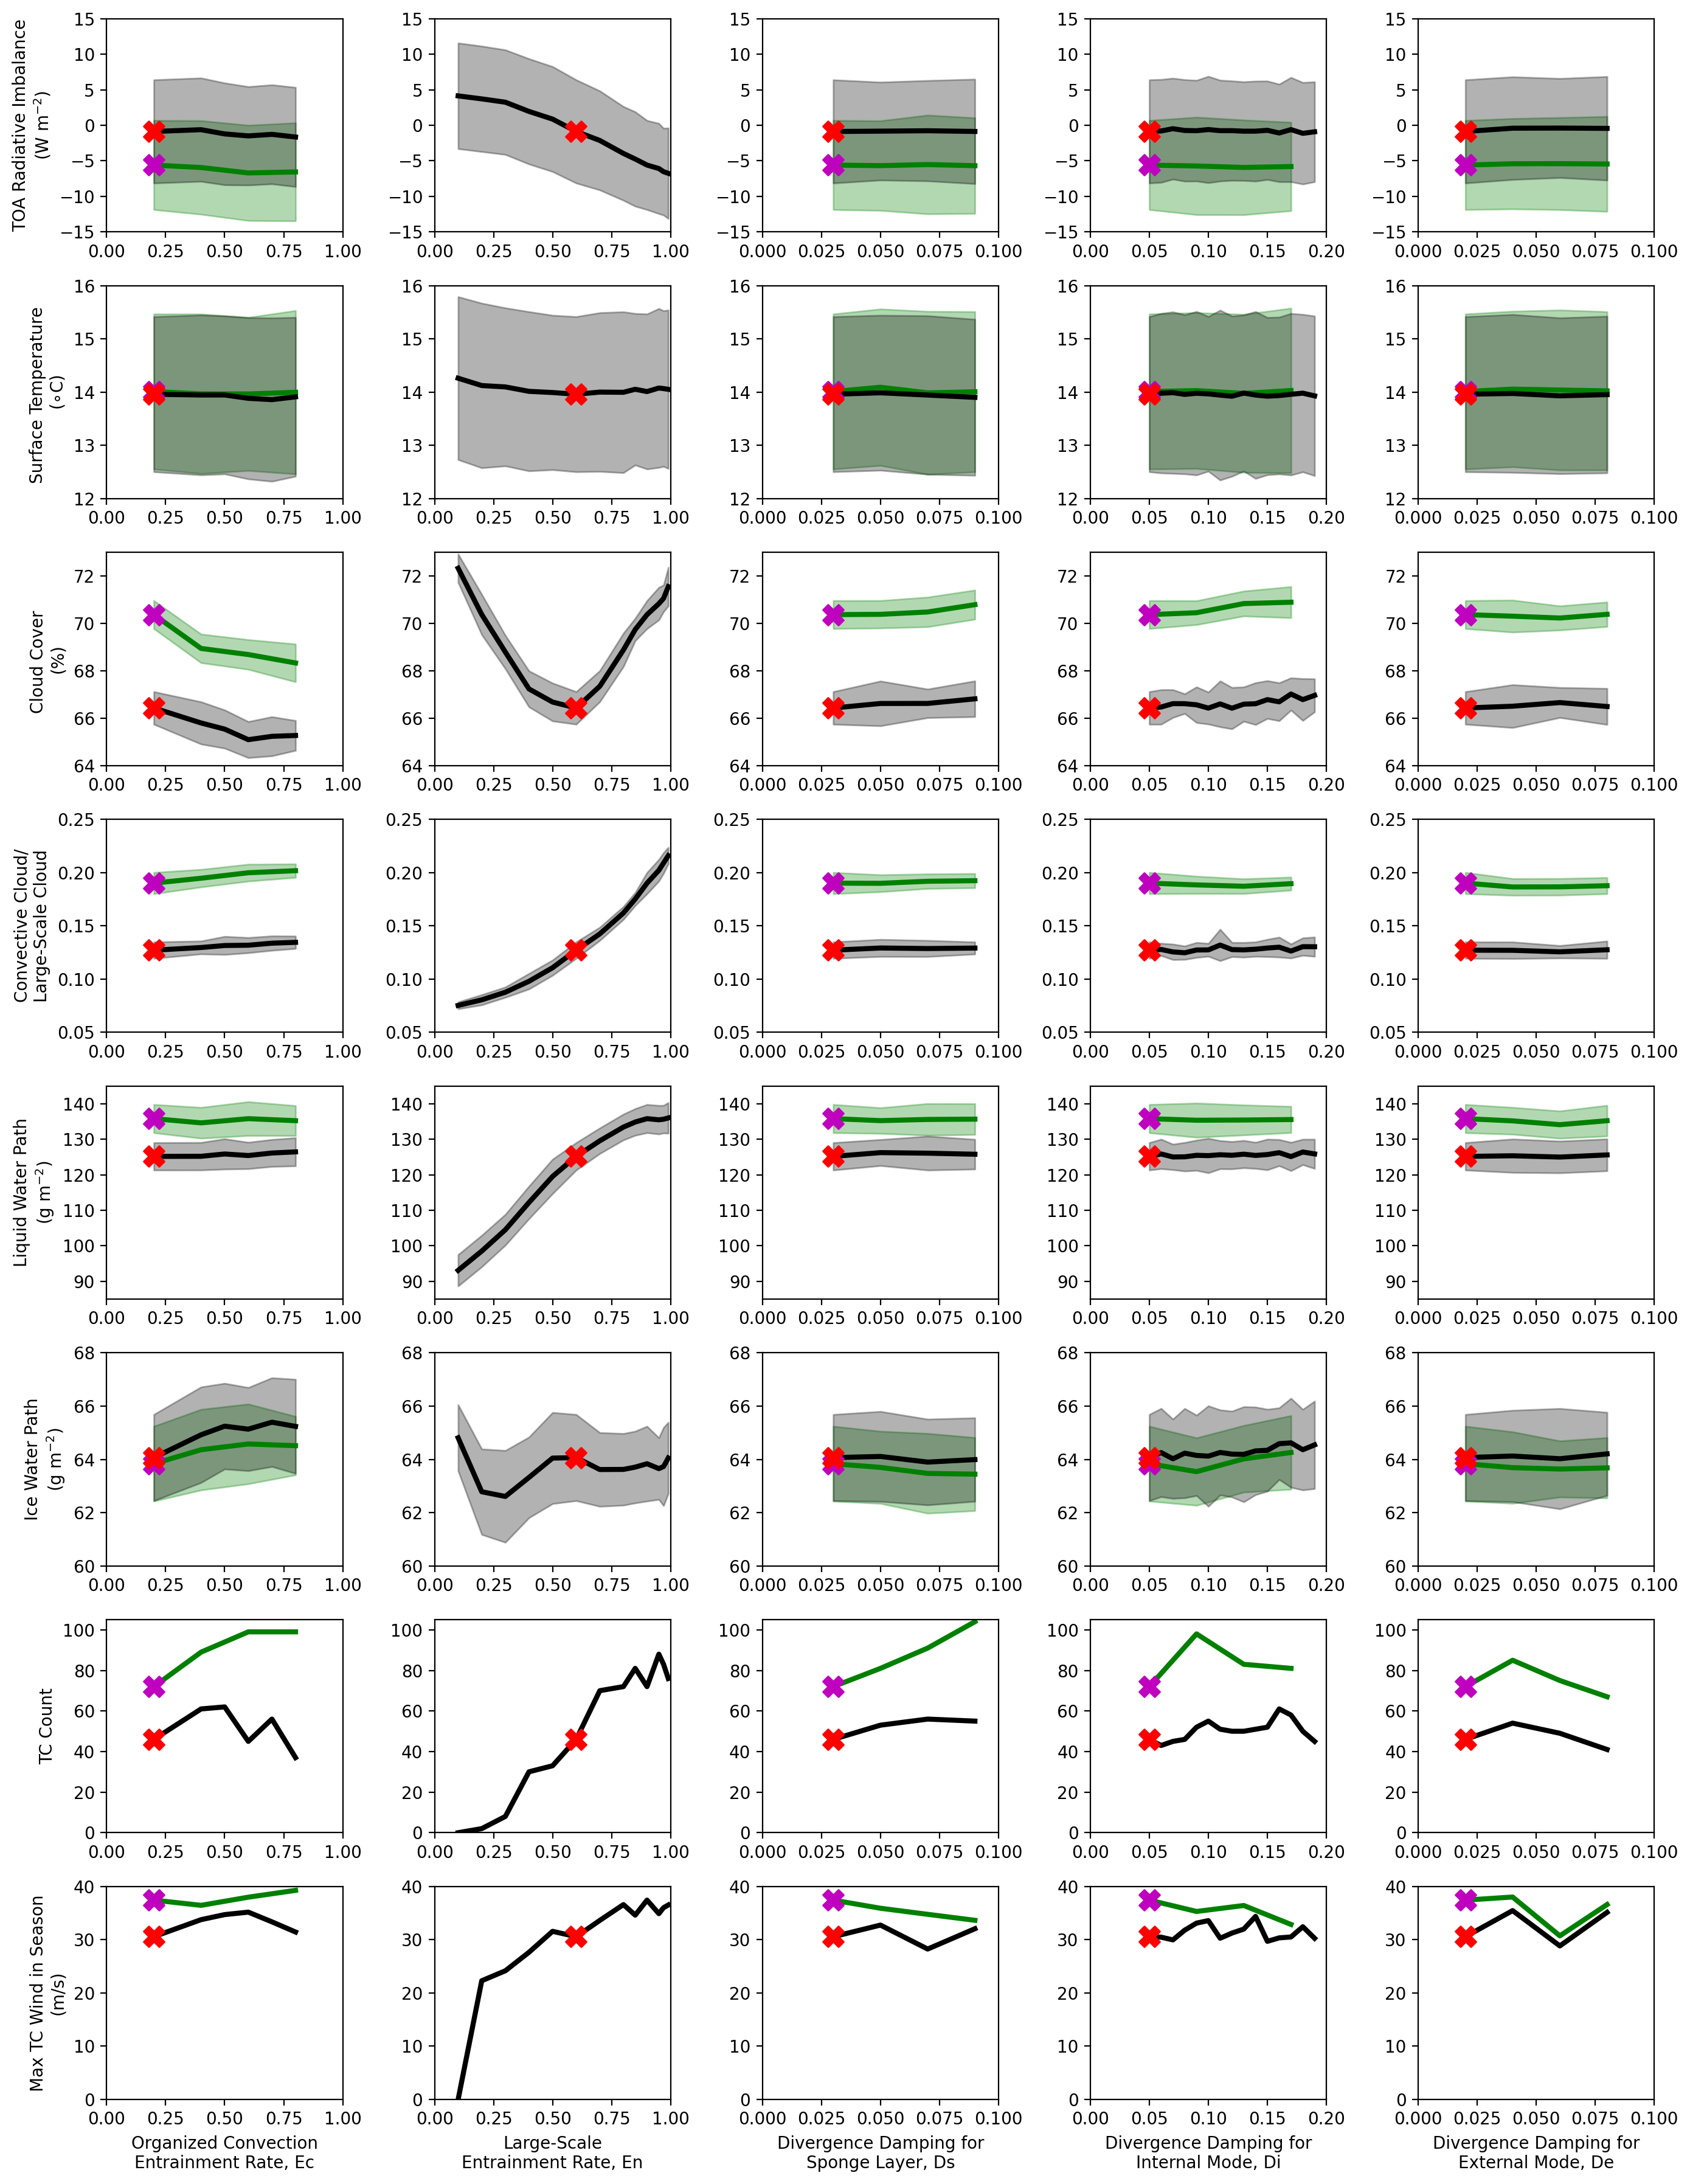

In [23]:
#For V1. Just copy every single panel from Jeff's stuff...
#40 panels! 
#Could I streamline this somehow? 
#Write a function? 
#Maybe type a few in manually, see what could easily be automated...

#How about defining functions for specific individual plots, just to 
#simplify things like matching up dimensions

plt.figure(figsize=(14,18), dpi=200)


plt.subplot(8,5,1)
plot_std_default_left_green(SensTest_v1, 'xaxis_En090Ec', 
                            SensTest_v1['TOA_En_m'][8], SensTest_v1['TOA_En_s'][8],
                      'TOA_En090Ec_m', 'TOA_En090Ec_s')
plot_std_default_left(SensTest_v1, 'xaxis_Ec', 'TOA_Dflt_m', 'TOA_Dflt_s', 
                      'TOA_Ec_m', 'TOA_Ec_s')
plot_default_left_green(SensTest_v1,'xaxis_En090Ec', SensTest_v1['TOA_En_m'][8], 
                         'TOA_En090Ec_m', 0.2)
plot_default_left(SensTest_v1, 'xaxis_Ec', 'TOA_Dflt_m', 
                  'TOA_Ec_m', 0.2)
plt.ylabel('TOA Radiative Imbalance\n(W m$^{-2}$)')
plt.axis([0,1,-15,15])

#Set axis limits (later)

plt.subplot(8,5,2)
plot_std_default_pos_5(SensTest_v1, 'xaxis_En', 'TOA_Dflt_m', 'TOA_Dflt_s', 
                      'TOA_En_m', 'TOA_En_s')
plot_default_pos_5(SensTest_v1, 'xaxis_En', 'TOA_Dflt_m', 
                  'TOA_En_m', 0.6)
plt.axis([0,1,-15,15])

plt.subplot(8,5,3)
plot_std_default_left_green(SensTest_v1, 'xaxis_En090Ds', 
                            SensTest_v1['TOA_En_m'][8], SensTest_v1['TOA_En_s'][8],
                      'TOA_En090Ds_m', 'TOA_En090Ds_s')
plot_std_default_left(SensTest_v1, 'xaxis_Ds', 'TOA_Dflt_m', 'TOA_Dflt_s', 
                      'TOA_Ds_m', 'TOA_Ds_s')
plot_default_left_green(SensTest_v1,'xaxis_En090Ds', SensTest_v1['TOA_En_m'][8], 
                         'TOA_En090Ds_m', 0.03)
plot_default_left(SensTest_v1, 'xaxis_Ds', 'TOA_Dflt_m', 
                  'TOA_Ds_m', 0.03)
plt.axis([0,0.1,-15,15])

plt.subplot(8,5,4)
plot_std_default_left_green(SensTest_v1, 'xaxis_En090Di', 
                            SensTest_v1['TOA_En_m'][8], SensTest_v1['TOA_En_s'][8],
                      'TOA_En090Di_m', 'TOA_En090Di_s')
plot_std_default_left(SensTest_v1, 'xaxis_Di', 'TOA_Dflt_m', 'TOA_Dflt_s', 
                      'TOA_Di_m', 'TOA_Di_s')
plot_default_left_green(SensTest_v1,'xaxis_En090Di', SensTest_v1['TOA_En_m'][8], 
                         'TOA_En090Di_m', 0.05)
plot_default_left(SensTest_v1, 'xaxis_Di', 'TOA_Dflt_m', 
                  'TOA_Di_m', 0.05)
plt.axis([0,0.2,-15,15])

plt.subplot(8,5,5)
plot_std_default_left_green(SensTest_v1, 'xaxis_En090De', 
                            SensTest_v1['TOA_En_m'][8], SensTest_v1['TOA_En_s'][8],
                      'TOA_En090De_m', 'TOA_En090De_s')
plot_std_default_left(SensTest_v1, 'xaxis_De', 'TOA_Dflt_m', 'TOA_Dflt_s', 
                      'TOA_De_m', 'TOA_De_s')
plot_default_left_green(SensTest_v1,'xaxis_En090De', SensTest_v1['TOA_En_m'][8], 
                         'TOA_En090De_m', 0.02)
plot_default_left(SensTest_v1, 'xaxis_De', 'TOA_Dflt_m', 
                  'TOA_De_m', 0.02)
plt.axis([0,0.1,-15,15])


plt.subplot(8,5,6)
plot_std_default_left_green(SensTest_v1, 'xaxis_En090Ec', 
                            SensTest_v1['GMST_En_m'][8], SensTest_v1['GMST_En_s'][8],
                      'GMST_En090Ec_m', 'GMST_En090Ec_s')
plot_std_default_left(SensTest_v1, 'xaxis_Ec', 'GMST_Dflt_m', 'GMST_Dflt_s', 
                      'GMST_Ec_m', 'GMST_Ec_s')
plot_default_left_green(SensTest_v1,'xaxis_En090Ec', SensTest_v1['GMST_En_m'][8], 
                         'GMST_En090Ec_m', 0.2)
plot_default_left(SensTest_v1, 'xaxis_Ec', 'GMST_Dflt_m', 
                  'GMST_Ec_m', 0.2)
plt.ylabel('Surface Temperature \n($\circ$C)')
plt.axis([0,1,12,16])

plt.subplot(8,5,7)
plot_std_default_pos_5(SensTest_v1, 'xaxis_En', 'GMST_Dflt_m', 'GMST_Dflt_s', 
                      'GMST_En_m', 'GMST_En_s')
plot_default_pos_5(SensTest_v1, 'xaxis_En', 'GMST_Dflt_m', 
                  'GMST_En_m', 0.6)
plt.axis([0,1,12,16])

plt.subplot(8,5,8)
plot_std_default_left_green(SensTest_v1, 'xaxis_En090Ds', 
                            SensTest_v1['GMST_En_m'][8], SensTest_v1['GMST_En_s'][8],
                      'GMST_En090Ds_m', 'GMST_En090Ds_s')
plot_std_default_left(SensTest_v1, 'xaxis_Ds', 'GMST_Dflt_m', 'GMST_Dflt_s', 
                      'GMST_Ds_m', 'GMST_Ds_s')
plot_default_left_green(SensTest_v1,'xaxis_En090Ds', SensTest_v1['GMST_En_m'][8], 
                         'GMST_En090Ds_m', 0.03)
plot_default_left(SensTest_v1, 'xaxis_Ds', 'GMST_Dflt_m', 
                  'GMST_Ds_m', 0.03)
plt.axis([0,0.1,12,16])

plt.subplot(8,5,9)
plot_std_default_left_green(SensTest_v1, 'xaxis_En090Di', 
                            SensTest_v1['GMST_En_m'][8], SensTest_v1['GMST_En_s'][8],
                      'GMST_En090Di_m', 'GMST_En090Di_s')
plot_std_default_left(SensTest_v1, 'xaxis_Di', 'GMST_Dflt_m', 'GMST_Dflt_s', 
                      'GMST_Di_m', 'GMST_Di_s')
plot_default_left_green(SensTest_v1,'xaxis_En090Di', SensTest_v1['GMST_En_m'][8], 
                         'GMST_En090Di_m', 0.05)
plot_default_left(SensTest_v1, 'xaxis_Di', 'GMST_Dflt_m', 
                  'GMST_Di_m', 0.05)
plt.axis([0,0.2,12,16])

plt.subplot(8,5,10)
plot_std_default_left_green(SensTest_v1, 'xaxis_En090De', 
                            SensTest_v1['GMST_En_m'][8], SensTest_v1['GMST_En_s'][8],
                      'GMST_En090De_m', 'GMST_En090De_s')
plot_std_default_left(SensTest_v1, 'xaxis_De', 'GMST_Dflt_m', 'GMST_Dflt_s', 
                      'GMST_De_m', 'GMST_De_s')
plot_default_left_green(SensTest_v1,'xaxis_En090De', SensTest_v1['GMST_En_m'][8], 
                         'GMST_En090De_m', 0.02)
plot_default_left(SensTest_v1, 'xaxis_De', 'GMST_Dflt_m', 
                  'GMST_De_m', 0.02)
plt.axis([0,0.1,12,16])

plt.subplot(8,5,11)
plot_std_default_left_green(SensTest_v1, 'xaxis_En090Ec', 
                            SensTest_v1['CLD_En_m'][8], SensTest_v1['CLD_En_s'][8],
                      'CLD_En090Ec_m', 'CLD_En090Ec_s')
plot_std_default_left(SensTest_v1, 'xaxis_Ec', 'CLD_Dflt_m', 'CLD_Dflt_s', 
                      'CLD_Ec_m', 'CLD_Ec_s')
plot_default_left_green(SensTest_v1,'xaxis_En090Ec', SensTest_v1['CLD_En_m'][8], 
                         'CLD_En090Ec_m', 0.2)
plot_default_left(SensTest_v1, 'xaxis_Ec', 'CLD_Dflt_m', 
                  'CLD_Ec_m', 0.2)
plt.ylabel('Cloud Cover \n(%)')
plt.axis([0,1,64,73])

plt.subplot(8,5,12)
plot_std_default_pos_5(SensTest_v1, 'xaxis_En', 'CLD_Dflt_m', 'CLD_Dflt_s', 
                      'CLD_En_m', 'CLD_En_s')
plot_default_pos_5(SensTest_v1, 'xaxis_En', 'CLD_Dflt_m', 
                  'CLD_En_m', 0.6)
plt.axis([0,1,64,73])

plt.subplot(8,5,13)
plot_std_default_left_green(SensTest_v1, 'xaxis_En090Ds', 
                            SensTest_v1['CLD_En_m'][8], SensTest_v1['CLD_En_s'][8],
                      'CLD_En090Ds_m', 'CLD_En090Ds_s')
plot_std_default_left(SensTest_v1, 'xaxis_Ds', 'CLD_Dflt_m', 'CLD_Dflt_s', 
                      'CLD_Ds_m', 'CLD_Ds_s')
plot_default_left_green(SensTest_v1,'xaxis_En090Ds', SensTest_v1['CLD_En_m'][8], 
                         'CLD_En090Ds_m', 0.03)
plot_default_left(SensTest_v1, 'xaxis_Ds', 'CLD_Dflt_m', 
                  'CLD_Ds_m', 0.03)
plt.axis([0,0.1,64,73])

plt.subplot(8,5,14)
plot_std_default_left_green(SensTest_v1, 'xaxis_En090Di', 
                            SensTest_v1['CLD_En_m'][8], SensTest_v1['CLD_En_s'][8],
                      'CLD_En090Di_m', 'CLD_En090Di_s')
plot_std_default_left(SensTest_v1, 'xaxis_Di', 'CLD_Dflt_m', 'CLD_Dflt_s', 
                      'CLD_Di_m', 'CLD_Di_s')
plot_default_left_green(SensTest_v1,'xaxis_En090Di', SensTest_v1['CLD_En_m'][8], 
                         'CLD_En090Di_m', 0.05)
plot_default_left(SensTest_v1, 'xaxis_Di', 'CLD_Dflt_m', 
                  'CLD_Di_m', 0.05)
plt.axis([0,0.2,64,73])

plt.subplot(8,5,15)
plot_std_default_left_green(SensTest_v1, 'xaxis_En090De', 
                            SensTest_v1['CLD_En_m'][8], SensTest_v1['CLD_En_s'][8],
                      'CLD_En090De_m', 'CLD_En090De_s')
plot_std_default_left(SensTest_v1, 'xaxis_De', 'CLD_Dflt_m', 'CLD_Dflt_s', 
                      'CLD_De_m', 'CLD_De_s')
plot_default_left_green(SensTest_v1,'xaxis_En090De', SensTest_v1['CLD_En_m'][8], 
                         'CLD_En090De_m', 0.02)
plot_default_left(SensTest_v1, 'xaxis_De', 'CLD_Dflt_m', 
                  'CLD_De_m', 0.02)
plt.axis([0,0.1,64,73])

plt.subplot(8,5,16)
plot_std_default_left_green(SensTest_v1, 'xaxis_En090Ec', 
                            SensTest_v1['CLS_En_m'][8], SensTest_v1['CLS_En_s'][8],
                      'CLS_En090Ec_m', 'CLS_En090Ec_s')
plot_std_default_left(SensTest_v1, 'xaxis_Ec', 'CLS_Dflt_m', 'CLS_Dflt_s', 
                      'CLS_Ec_m', 'CLS_Ec_s')
plot_default_left_green(SensTest_v1,'xaxis_En090Ec', SensTest_v1['CLS_En_m'][8], 
                         'CLS_En090Ec_m', 0.2)
plot_default_left(SensTest_v1, 'xaxis_Ec', 'CLS_Dflt_m', 
                  'CLS_Ec_m', 0.2)
plt.ylabel('Convective Cloud/\nLarge-Scale Cloud')
plt.axis([0,1,0.05,0.25])

plt.subplot(8,5,17)
plot_std_default_pos_5(SensTest_v1, 'xaxis_En', 'CLS_Dflt_m', 'CLS_Dflt_s', 
                      'CLS_En_m', 'CLS_En_s')
plot_default_pos_5(SensTest_v1, 'xaxis_En', 'CLS_Dflt_m', 
                  'CLS_En_m', 0.6)
plt.axis([0,1,0.05,0.25])

plt.subplot(8,5,18)
plot_std_default_left_green(SensTest_v1, 'xaxis_En090Ds', 
                            SensTest_v1['CLS_En_m'][8], SensTest_v1['CLS_En_s'][8],
                      'CLS_En090Ds_m', 'CLS_En090Ds_s')
plot_std_default_left(SensTest_v1, 'xaxis_Ds', 'CLS_Dflt_m', 'CLS_Dflt_s', 
                      'CLS_Ds_m', 'CLS_Ds_s')
plot_default_left_green(SensTest_v1,'xaxis_En090Ds', SensTest_v1['CLS_En_m'][8], 
                         'CLS_En090Ds_m', 0.03)
plot_default_left(SensTest_v1, 'xaxis_Ds', 'CLS_Dflt_m', 
                  'CLS_Ds_m', 0.03)
plt.axis([0,0.1,0.05,0.25])

plt.subplot(8,5,19)
plot_std_default_left_green(SensTest_v1, 'xaxis_En090Di', 
                            SensTest_v1['CLS_En_m'][8], SensTest_v1['CLS_En_s'][8],
                      'CLS_En090Di_m', 'CLS_En090Di_s')
plot_std_default_left(SensTest_v1, 'xaxis_Di', 'CLS_Dflt_m', 'CLS_Dflt_s', 
                      'CLS_Di_m', 'CLS_Di_s')
plot_default_left_green(SensTest_v1,'xaxis_En090Di', SensTest_v1['CLS_En_m'][8], 
                         'CLS_En090Di_m', 0.05)
plot_default_left(SensTest_v1, 'xaxis_Di', 'CLS_Dflt_m', 
                  'CLS_Di_m', 0.05)
plt.axis([0,0.2,0.05,0.25])

plt.subplot(8,5,20)
plot_std_default_left_green(SensTest_v1, 'xaxis_En090De', 
                            SensTest_v1['CLS_En_m'][8], SensTest_v1['CLS_En_s'][8],
                      'CLS_En090De_m', 'CLS_En090De_s')
plot_std_default_left(SensTest_v1, 'xaxis_De', 'CLS_Dflt_m', 'CLS_Dflt_s', 
                      'CLS_De_m', 'CLS_De_s')
plot_default_left_green(SensTest_v1,'xaxis_En090De', SensTest_v1['CLS_En_m'][8], 
                         'CLS_En090De_m', 0.02)
plot_default_left(SensTest_v1, 'xaxis_De', 'CLS_Dflt_m', 
                  'CLS_De_m', 0.02)
plt.axis([0,0.1,0.05,0.25])

plt.subplot(8,5,21)
plot_std_default_left_green(SensTest_v1, 'xaxis_En090Ec', 
                            SensTest_v1['LWP_En_m'][8], SensTest_v1['LWP_En_s'][8],
                      'LWP_En090Ec_m', 'LWP_En090Ec_s')
plot_std_default_left(SensTest_v1, 'xaxis_Ec', 'LWP_Dflt_m', 'LWP_Dflt_s', 
                      'LWP_Ec_m', 'LWP_Ec_s')
plot_default_left_green(SensTest_v1,'xaxis_En090Ec', SensTest_v1['LWP_En_m'][8], 
                         'LWP_En090Ec_m', 0.2)
plot_default_left(SensTest_v1, 'xaxis_Ec', 'LWP_Dflt_m', 
                  'LWP_Ec_m', 0.2)
plt.ylabel('Liquid Water Path\n(g m$^{-2}$)')
plt.axis([0,1,85,145])

plt.subplot(8,5,22)
plot_std_default_pos_5(SensTest_v1, 'xaxis_En', 'LWP_Dflt_m', 'LWP_Dflt_s', 
                      'LWP_En_m', 'LWP_En_s')
plot_default_pos_5(SensTest_v1, 'xaxis_En', 'LWP_Dflt_m', 
                  'LWP_En_m', 0.6)
plt.axis([0,1,85,145])

plt.subplot(8,5,23)
plot_std_default_left_green(SensTest_v1, 'xaxis_En090Ds', 
                            SensTest_v1['LWP_En_m'][8], SensTest_v1['LWP_En_s'][8],
                      'LWP_En090Ds_m', 'LWP_En090Ds_s')
plot_std_default_left(SensTest_v1, 'xaxis_Ds', 'LWP_Dflt_m', 'LWP_Dflt_s', 
                      'LWP_Ds_m', 'LWP_Ds_s')
plot_default_left_green(SensTest_v1,'xaxis_En090Ds', SensTest_v1['LWP_En_m'][8], 
                         'LWP_En090Ds_m', 0.03)
plot_default_left(SensTest_v1, 'xaxis_Ds', 'LWP_Dflt_m', 
                  'LWP_Ds_m', 0.03)
plt.axis([0,0.1,85,145])

plt.subplot(8,5,24)
plot_std_default_left_green(SensTest_v1, 'xaxis_En090Di', 
                            SensTest_v1['LWP_En_m'][8], SensTest_v1['LWP_En_s'][8],
                      'LWP_En090Di_m', 'LWP_En090Di_s')
plot_std_default_left(SensTest_v1, 'xaxis_Di', 'LWP_Dflt_m', 'LWP_Dflt_s', 
                      'LWP_Di_m', 'LWP_Di_s')
plot_default_left_green(SensTest_v1,'xaxis_En090Di', SensTest_v1['LWP_En_m'][8], 
                         'LWP_En090Di_m', 0.05)
plot_default_left(SensTest_v1, 'xaxis_Di', 'LWP_Dflt_m', 
                  'LWP_Di_m', 0.05)
plt.axis([0,0.2,85,145])

plt.subplot(8,5,25)
plot_std_default_left_green(SensTest_v1, 'xaxis_En090De', 
                            SensTest_v1['LWP_En_m'][8], SensTest_v1['LWP_En_s'][8],
                      'LWP_En090De_m', 'LWP_En090De_s')
plot_std_default_left(SensTest_v1, 'xaxis_De', 'LWP_Dflt_m', 'LWP_Dflt_s', 
                      'LWP_De_m', 'LWP_De_s')
plot_default_left_green(SensTest_v1,'xaxis_En090De', SensTest_v1['LWP_En_m'][8], 
                         'LWP_En090De_m', 0.02)
plot_default_left(SensTest_v1, 'xaxis_De', 'LWP_Dflt_m', 
                  'LWP_De_m', 0.02)
plt.axis([0,0.1,85,145])

plt.subplot(8,5,26)
plot_std_default_left_green(SensTest_v1, 'xaxis_En090Ec', 
                            SensTest_v1['IWP_En_m'][8], SensTest_v1['IWP_En_s'][8],
                      'IWP_En090Ec_m', 'IWP_En090Ec_s')
plot_std_default_left(SensTest_v1, 'xaxis_Ec', 'IWP_Dflt_m', 'IWP_Dflt_s', 
                      'IWP_Ec_m', 'IWP_Ec_s')
plot_default_left_green(SensTest_v1,'xaxis_En090Ec', SensTest_v1['IWP_En_m'][8], 
                         'IWP_En090Ec_m', 0.2)
plot_default_left(SensTest_v1, 'xaxis_Ec', 'IWP_Dflt_m', 
                  'IWP_Ec_m', 0.2)
plt.ylabel('Ice Water Path\n(g m$^{-2}$)')
plt.axis([0,1,60,68])

plt.subplot(8,5,27)
plot_std_default_pos_5(SensTest_v1, 'xaxis_En', 'IWP_Dflt_m', 'IWP_Dflt_s', 
                      'IWP_En_m', 'IWP_En_s')
plot_default_pos_5(SensTest_v1, 'xaxis_En', 'IWP_Dflt_m', 
                  'IWP_En_m', 0.6)
plt.axis([0,1,60,68])

plt.subplot(8,5,28)
plot_std_default_left_green(SensTest_v1, 'xaxis_En090Ds', 
                            SensTest_v1['IWP_En_m'][8], SensTest_v1['IWP_En_s'][8],
                      'IWP_En090Ds_m', 'IWP_En090Ds_s')
plot_std_default_left(SensTest_v1, 'xaxis_Ds', 'IWP_Dflt_m', 'IWP_Dflt_s', 
                      'IWP_Ds_m', 'IWP_Ds_s')
plot_default_left_green(SensTest_v1,'xaxis_En090Ds', SensTest_v1['IWP_En_m'][8], 
                         'IWP_En090Ds_m', 0.03)
plot_default_left(SensTest_v1, 'xaxis_Ds', 'IWP_Dflt_m', 
                  'IWP_Ds_m', 0.03)
plt.axis([0,0.1,60,68])

plt.subplot(8,5,29)
plot_std_default_left_green(SensTest_v1, 'xaxis_En090Di', 
                            SensTest_v1['IWP_En_m'][8], SensTest_v1['IWP_En_s'][8],
                      'IWP_En090Di_m', 'IWP_En090Di_s')
plot_std_default_left(SensTest_v1, 'xaxis_Di', 'IWP_Dflt_m', 'IWP_Dflt_s', 
                      'IWP_Di_m', 'IWP_Di_s')
plot_default_left_green(SensTest_v1,'xaxis_En090Di', SensTest_v1['IWP_En_m'][8], 
                         'IWP_En090Di_m', 0.05)
plot_default_left(SensTest_v1, 'xaxis_Di', 'IWP_Dflt_m', 
                  'IWP_Di_m', 0.05)
plt.axis([0,0.2,60,68])

plt.subplot(8,5,30)
plot_std_default_left_green(SensTest_v1, 'xaxis_En090De', 
                            SensTest_v1['IWP_En_m'][8], SensTest_v1['IWP_En_s'][8],
                      'IWP_En090De_m', 'IWP_En090De_s')
plot_std_default_left(SensTest_v1, 'xaxis_De', 'IWP_Dflt_m', 'IWP_Dflt_s', 
                      'IWP_De_m', 'IWP_De_s')
plot_default_left_green(SensTest_v1,'xaxis_En090De', SensTest_v1['IWP_En_m'][8], 
                         'IWP_En090De_m', 0.02)
plot_default_left(SensTest_v1, 'xaxis_De', 'IWP_Dflt_m', 
                  'IWP_De_m', 0.02)
plt.axis([0,0.1,60,68])

plt.subplot(8,5,31)
plot_default_left_green(SensTest_v1,'xaxis_En090Ec', SensTest_v1['COUNTS_En'][8], 
                         'COUNTS_En090Ec', 0.2)
plot_default_left(SensTest_v1, 'xaxis_Ec', 'COUNTS_Dflt', 
                  'COUNTS_Ec', 0.2)
plt.ylabel('TC Count')
plt.axis([0,1,0,105])

plt.subplot(8,5,32)
plot_default_pos_5(SensTest_v1, 'xaxis_En', 'COUNTS_Dflt', 
                  'COUNTS_En', 0.6)
plt.axis([0,1,0,105])


plt.subplot(8,5,33)
plot_default_left_green(SensTest_v1,'xaxis_En090Ds', SensTest_v1['COUNTS_En'][8], 
                         'COUNTS_En090Ds', 0.03)
plot_default_left(SensTest_v1, 'xaxis_Ds', 'COUNTS_Dflt', 
                  'COUNTS_Ds', 0.03)
plt.axis([0,0.1,0,105])


plt.subplot(8,5,34)
plot_default_left_green(SensTest_v1,'xaxis_En090Di', SensTest_v1['COUNTS_En'][8], 
                         'COUNTS_En090Di', 0.05)
plot_default_left(SensTest_v1, 'xaxis_Di', 'COUNTS_Dflt', 
                  'COUNTS_Di', 0.05)
plt.axis([0,0.2,0,105])

plt.subplot(8,5,35)
plot_default_left_green(SensTest_v1,'xaxis_En090De', SensTest_v1['COUNTS_En'][8], 
                         'COUNTS_En090De', 0.02)
plot_default_left(SensTest_v1, 'xaxis_De', 'COUNTS_Dflt', 
                  'COUNTS_De', 0.02)
plt.axis([0,0.1,0,105])

plt.subplot(8,5,36)
plot_default_left_green(SensTest_v1,'xaxis_En090Ec', SensTest_v1['WSPD_En'][8], 
                         'WSPD_En090Ec', 0.2)
plot_default_left(SensTest_v1, 'xaxis_Ec', 'WSPD_Dflt', 
                  'WSPD_Ec', 0.2)
plt.ylabel('Max TC Wind in Season\n(m/s)')
plt.xlabel('Organized Convection\nEntrainment Rate, Ec')
plt.axis([0,1,0,40])


plt.subplot(8,5,37)
plot_default_pos_5(SensTest_v1, 'xaxis_En', 'WSPD_Dflt', 
                  'WSPD_En', 0.6)
plt.xlabel('Large-Scale\nEntrainment Rate, En')
plt.axis([0,1,0,40])

plt.subplot(8,5,38)
plot_default_left_green(SensTest_v1,'xaxis_En090Ds', SensTest_v1['WSPD_En'][8], 
                         'WSPD_En090Ds', 0.03)
plot_default_left(SensTest_v1, 'xaxis_Ds', 'WSPD_Dflt', 
                  'WSPD_Ds', 0.03)
plt.xlabel('Divergence Damping for\nSponge Layer, Ds')
plt.axis([0,0.1,0,40])

plt.subplot(8,5,39)
plot_default_left_green(SensTest_v1,'xaxis_En090Di', SensTest_v1['WSPD_En'][8], 
                         'WSPD_En090Di', 0.05)
plot_default_left(SensTest_v1, 'xaxis_Di', 'WSPD_Dflt', 
                  'WSPD_Di', 0.05)
plt.xlabel('Divergence Damping for\nInternal Mode, Di')
plt.axis([0,0.2,0,40])

plt.subplot(8,5,40)
plot_default_left_green(SensTest_v1,'xaxis_En090De', SensTest_v1['WSPD_En'][8], 
                         'WSPD_En090De', 0.02)
plot_default_left(SensTest_v1, 'xaxis_De', 'WSPD_Dflt', 
                  'WSPD_De', 0.02)
plt.xlabel('Divergence Damping for\nExternal Mode, De')
plt.axis([0,0.1,0,40])

plt.tight_layout()
plt.savefig('plots/sensitivity_test_8x5.png')
plt.savefig('plots/sensitivity_test_8x5.pdf')


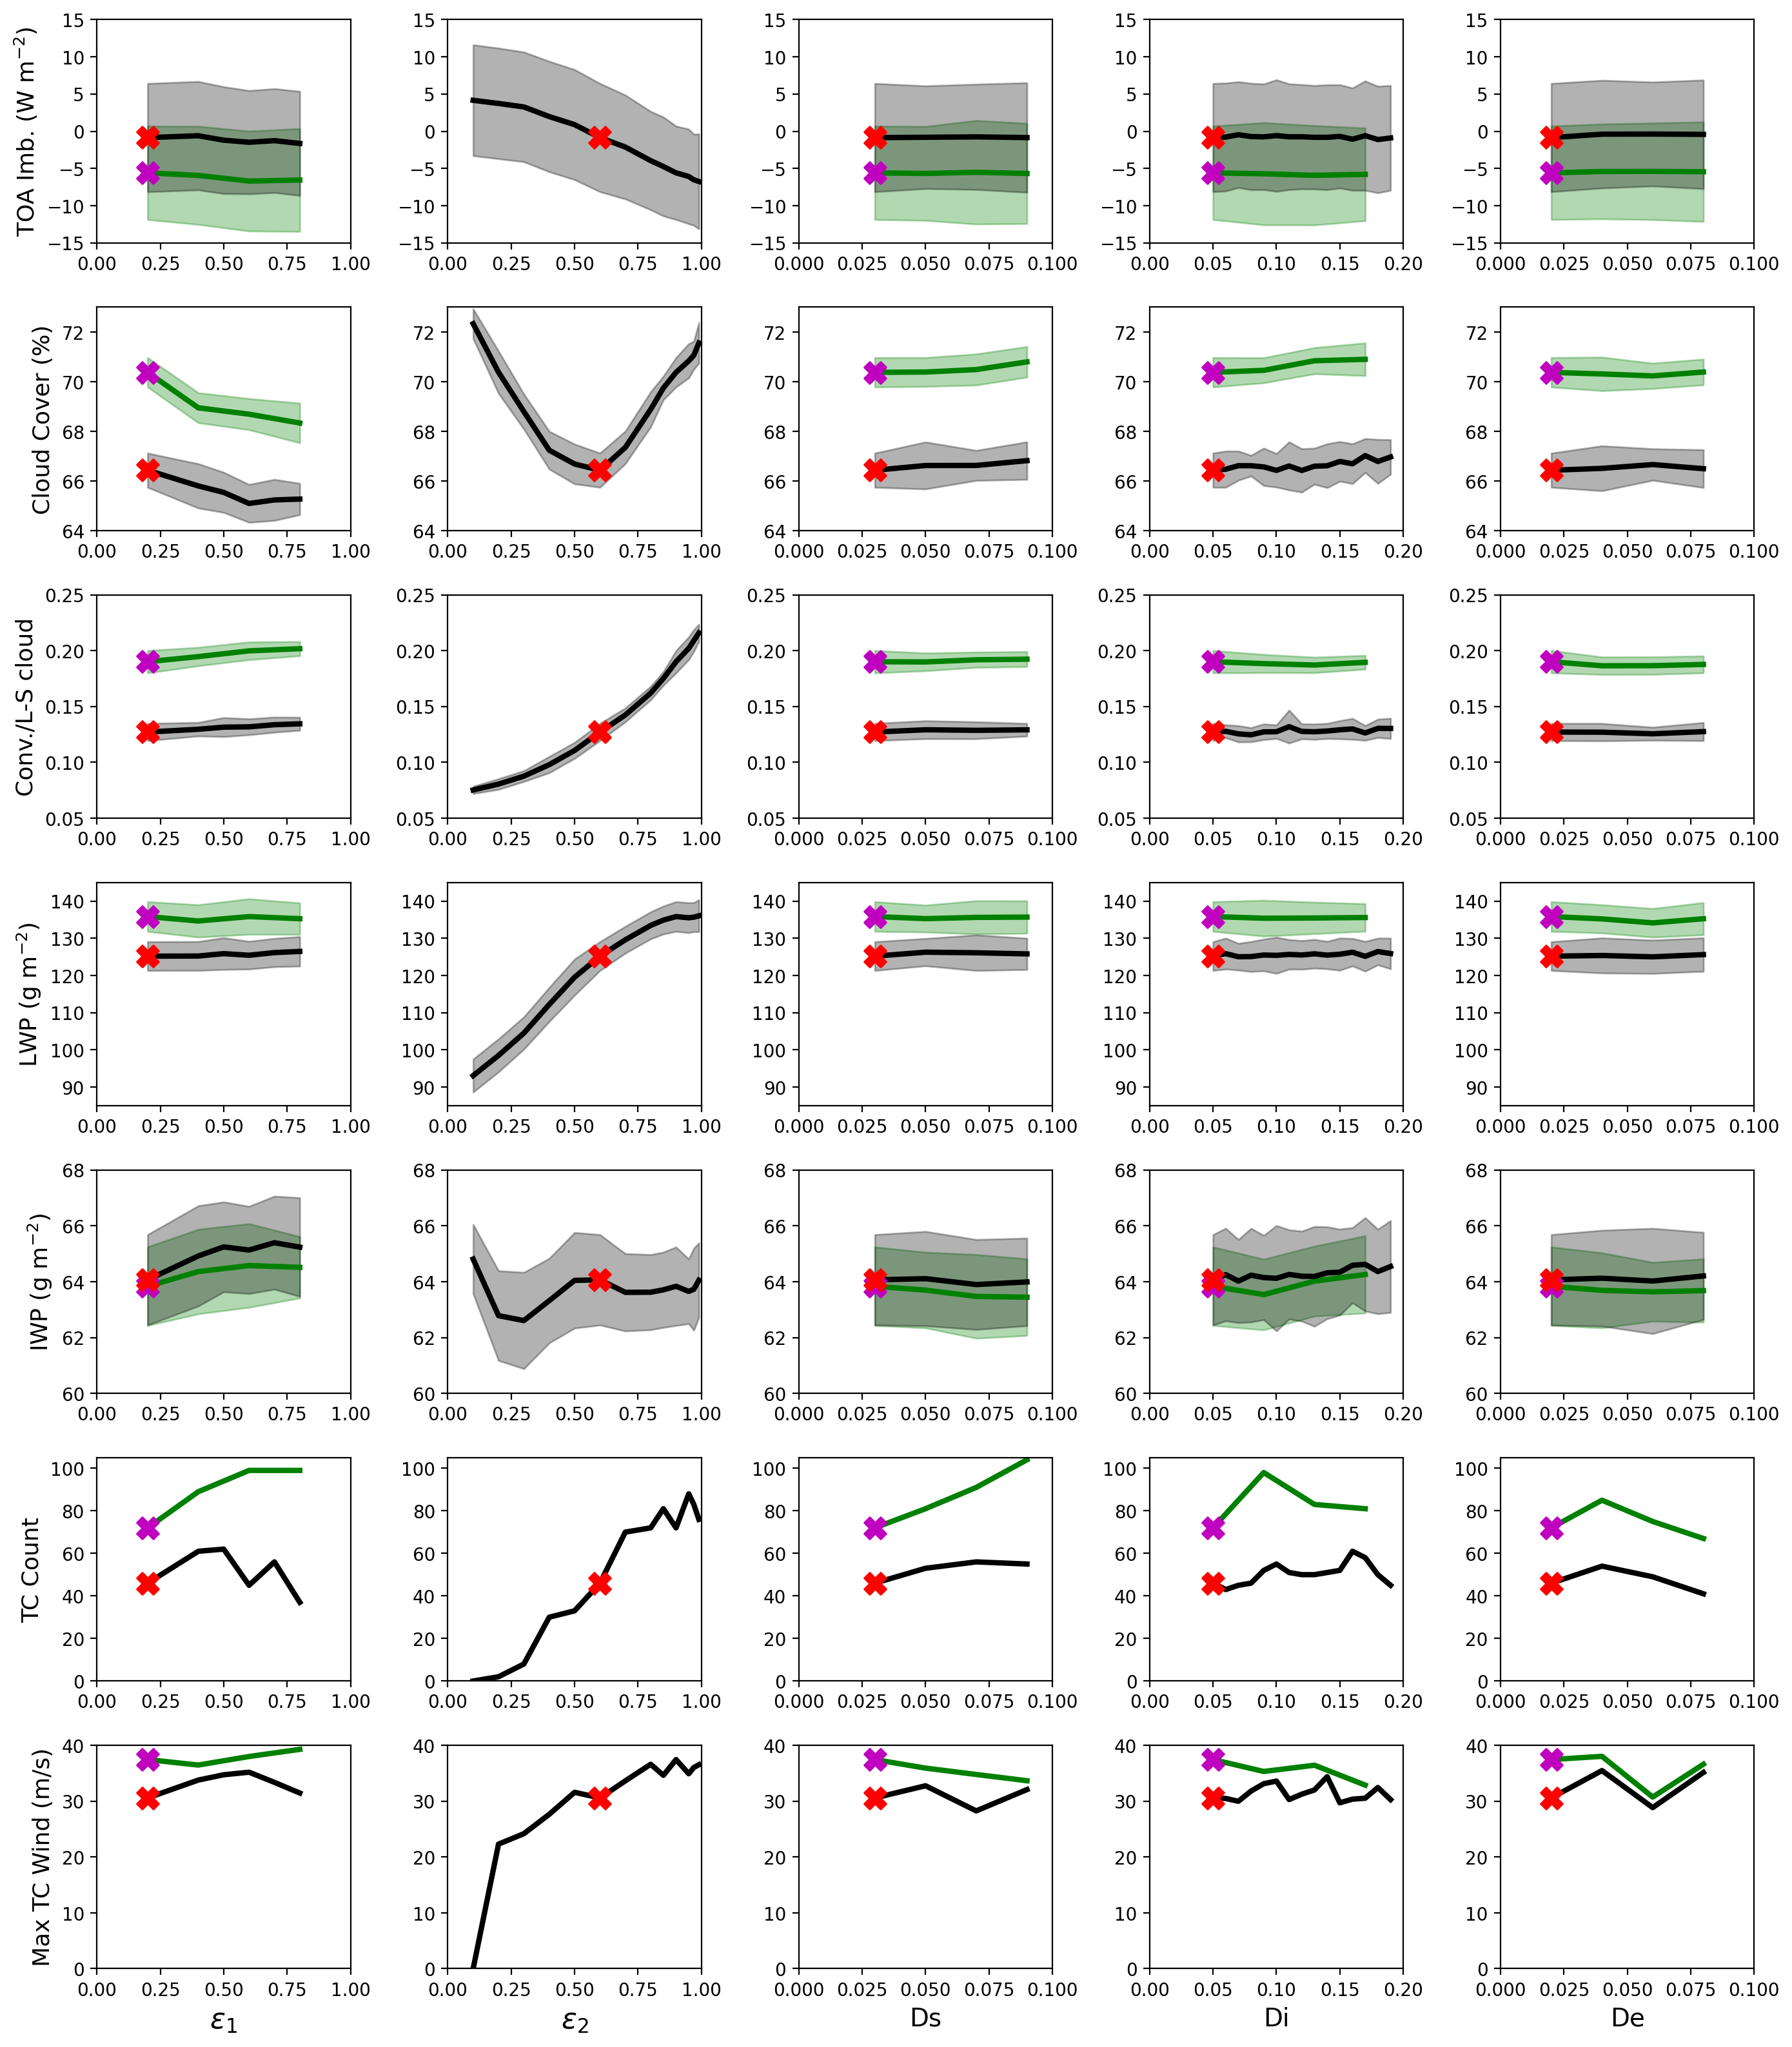

In [37]:
#Revised version taking out temperature and changing the names of the entrainment term labels 

plt.figure(figsize=(14,16), dpi=200)


plt.subplot(7,5,1)
plot_std_default_left_green(SensTest_v1, 'xaxis_En090Ec', 
                            SensTest_v1['TOA_En_m'][8], SensTest_v1['TOA_En_s'][8],
                      'TOA_En090Ec_m', 'TOA_En090Ec_s')
plot_std_default_left(SensTest_v1, 'xaxis_Ec', 'TOA_Dflt_m', 'TOA_Dflt_s', 
                      'TOA_Ec_m', 'TOA_Ec_s')
plot_default_left_green(SensTest_v1,'xaxis_En090Ec', SensTest_v1['TOA_En_m'][8], 
                         'TOA_En090Ec_m', 0.2)
plot_default_left(SensTest_v1, 'xaxis_Ec', 'TOA_Dflt_m', 
                  'TOA_Ec_m', 0.2)
plt.ylabel('TOA Imb. (W m$^{-2}$)', fontsize=13)
plt.axis([0,1,-15,15])

#Set axis limits (later)

plt.subplot(7,5,2)
plot_std_default_pos_5(SensTest_v1, 'xaxis_En', 'TOA_Dflt_m', 'TOA_Dflt_s', 
                      'TOA_En_m', 'TOA_En_s')
plot_default_pos_5(SensTest_v1, 'xaxis_En', 'TOA_Dflt_m', 
                  'TOA_En_m', 0.6)
plt.axis([0,1,-15,15])

plt.subplot(7,5,3)
plot_std_default_left_green(SensTest_v1, 'xaxis_En090Ds', 
                            SensTest_v1['TOA_En_m'][8], SensTest_v1['TOA_En_s'][8],
                      'TOA_En090Ds_m', 'TOA_En090Ds_s')
plot_std_default_left(SensTest_v1, 'xaxis_Ds', 'TOA_Dflt_m', 'TOA_Dflt_s', 
                      'TOA_Ds_m', 'TOA_Ds_s')
plot_default_left_green(SensTest_v1,'xaxis_En090Ds', SensTest_v1['TOA_En_m'][8], 
                         'TOA_En090Ds_m', 0.03)
plot_default_left(SensTest_v1, 'xaxis_Ds', 'TOA_Dflt_m', 
                  'TOA_Ds_m', 0.03)
plt.axis([0,0.1,-15,15])

plt.subplot(7,5,4)
plot_std_default_left_green(SensTest_v1, 'xaxis_En090Di', 
                            SensTest_v1['TOA_En_m'][8], SensTest_v1['TOA_En_s'][8],
                      'TOA_En090Di_m', 'TOA_En090Di_s')
plot_std_default_left(SensTest_v1, 'xaxis_Di', 'TOA_Dflt_m', 'TOA_Dflt_s', 
                      'TOA_Di_m', 'TOA_Di_s')
plot_default_left_green(SensTest_v1,'xaxis_En090Di', SensTest_v1['TOA_En_m'][8], 
                         'TOA_En090Di_m', 0.05)
plot_default_left(SensTest_v1, 'xaxis_Di', 'TOA_Dflt_m', 
                  'TOA_Di_m', 0.05)
plt.axis([0,0.2,-15,15])

plt.subplot(7,5,5)
plot_std_default_left_green(SensTest_v1, 'xaxis_En090De', 
                            SensTest_v1['TOA_En_m'][8], SensTest_v1['TOA_En_s'][8],
                      'TOA_En090De_m', 'TOA_En090De_s')
plot_std_default_left(SensTest_v1, 'xaxis_De', 'TOA_Dflt_m', 'TOA_Dflt_s', 
                      'TOA_De_m', 'TOA_De_s')
plot_default_left_green(SensTest_v1,'xaxis_En090De', SensTest_v1['TOA_En_m'][8], 
                         'TOA_En090De_m', 0.02)
plot_default_left(SensTest_v1, 'xaxis_De', 'TOA_Dflt_m', 
                  'TOA_De_m', 0.02)
plt.axis([0,0.1,-15,15])

plt.subplot(7,5,6)
plot_std_default_left_green(SensTest_v1, 'xaxis_En090Ec', 
                            SensTest_v1['CLD_En_m'][8], SensTest_v1['CLD_En_s'][8],
                      'CLD_En090Ec_m', 'CLD_En090Ec_s')
plot_std_default_left(SensTest_v1, 'xaxis_Ec', 'CLD_Dflt_m', 'CLD_Dflt_s', 
                      'CLD_Ec_m', 'CLD_Ec_s')
plot_default_left_green(SensTest_v1,'xaxis_En090Ec', SensTest_v1['CLD_En_m'][8], 
                         'CLD_En090Ec_m', 0.2)
plot_default_left(SensTest_v1, 'xaxis_Ec', 'CLD_Dflt_m', 
                  'CLD_Ec_m', 0.2)
plt.ylabel('Cloud Cover (%)', fontsize=13)
plt.axis([0,1,64,73])

plt.subplot(7,5,7)
plot_std_default_pos_5(SensTest_v1, 'xaxis_En', 'CLD_Dflt_m', 'CLD_Dflt_s', 
                      'CLD_En_m', 'CLD_En_s')
plot_default_pos_5(SensTest_v1, 'xaxis_En', 'CLD_Dflt_m', 
                  'CLD_En_m', 0.6)
plt.axis([0,1,64,73])

plt.subplot(7,5,8)
plot_std_default_left_green(SensTest_v1, 'xaxis_En090Ds', 
                            SensTest_v1['CLD_En_m'][8], SensTest_v1['CLD_En_s'][8],
                      'CLD_En090Ds_m', 'CLD_En090Ds_s')
plot_std_default_left(SensTest_v1, 'xaxis_Ds', 'CLD_Dflt_m', 'CLD_Dflt_s', 
                      'CLD_Ds_m', 'CLD_Ds_s')
plot_default_left_green(SensTest_v1,'xaxis_En090Ds', SensTest_v1['CLD_En_m'][8], 
                         'CLD_En090Ds_m', 0.03)
plot_default_left(SensTest_v1, 'xaxis_Ds', 'CLD_Dflt_m', 
                  'CLD_Ds_m', 0.03)
plt.axis([0,0.1,64,73])

plt.subplot(7,5,9)
plot_std_default_left_green(SensTest_v1, 'xaxis_En090Di', 
                            SensTest_v1['CLD_En_m'][8], SensTest_v1['CLD_En_s'][8],
                      'CLD_En090Di_m', 'CLD_En090Di_s')
plot_std_default_left(SensTest_v1, 'xaxis_Di', 'CLD_Dflt_m', 'CLD_Dflt_s', 
                      'CLD_Di_m', 'CLD_Di_s')
plot_default_left_green(SensTest_v1,'xaxis_En090Di', SensTest_v1['CLD_En_m'][8], 
                         'CLD_En090Di_m', 0.05)
plot_default_left(SensTest_v1, 'xaxis_Di', 'CLD_Dflt_m', 
                  'CLD_Di_m', 0.05)
plt.axis([0,0.2,64,73])

plt.subplot(7,5,10)
plot_std_default_left_green(SensTest_v1, 'xaxis_En090De', 
                            SensTest_v1['CLD_En_m'][8], SensTest_v1['CLD_En_s'][8],
                      'CLD_En090De_m', 'CLD_En090De_s')
plot_std_default_left(SensTest_v1, 'xaxis_De', 'CLD_Dflt_m', 'CLD_Dflt_s', 
                      'CLD_De_m', 'CLD_De_s')
plot_default_left_green(SensTest_v1,'xaxis_En090De', SensTest_v1['CLD_En_m'][8], 
                         'CLD_En090De_m', 0.02)
plot_default_left(SensTest_v1, 'xaxis_De', 'CLD_Dflt_m', 
                  'CLD_De_m', 0.02)
plt.axis([0,0.1,64,73])

plt.subplot(7,5,11)
plot_std_default_left_green(SensTest_v1, 'xaxis_En090Ec', 
                            SensTest_v1['CLS_En_m'][8], SensTest_v1['CLS_En_s'][8],
                      'CLS_En090Ec_m', 'CLS_En090Ec_s')
plot_std_default_left(SensTest_v1, 'xaxis_Ec', 'CLS_Dflt_m', 'CLS_Dflt_s', 
                      'CLS_Ec_m', 'CLS_Ec_s')
plot_default_left_green(SensTest_v1,'xaxis_En090Ec', SensTest_v1['CLS_En_m'][8], 
                         'CLS_En090Ec_m', 0.2)
plot_default_left(SensTest_v1, 'xaxis_Ec', 'CLS_Dflt_m', 
                  'CLS_Ec_m', 0.2)
plt.ylabel('Conv./L-S cloud', fontsize=13)
plt.axis([0,1,0.05,0.25])

plt.subplot(7,5,12)
plot_std_default_pos_5(SensTest_v1, 'xaxis_En', 'CLS_Dflt_m', 'CLS_Dflt_s', 
                      'CLS_En_m', 'CLS_En_s')
plot_default_pos_5(SensTest_v1, 'xaxis_En', 'CLS_Dflt_m', 
                  'CLS_En_m', 0.6)
plt.axis([0,1,0.05,0.25])

plt.subplot(7,5,13)
plot_std_default_left_green(SensTest_v1, 'xaxis_En090Ds', 
                            SensTest_v1['CLS_En_m'][8], SensTest_v1['CLS_En_s'][8],
                      'CLS_En090Ds_m', 'CLS_En090Ds_s')
plot_std_default_left(SensTest_v1, 'xaxis_Ds', 'CLS_Dflt_m', 'CLS_Dflt_s', 
                      'CLS_Ds_m', 'CLS_Ds_s')
plot_default_left_green(SensTest_v1,'xaxis_En090Ds', SensTest_v1['CLS_En_m'][8], 
                         'CLS_En090Ds_m', 0.03)
plot_default_left(SensTest_v1, 'xaxis_Ds', 'CLS_Dflt_m', 
                  'CLS_Ds_m', 0.03)
plt.axis([0,0.1,0.05,0.25])

plt.subplot(7,5,14)
plot_std_default_left_green(SensTest_v1, 'xaxis_En090Di', 
                            SensTest_v1['CLS_En_m'][8], SensTest_v1['CLS_En_s'][8],
                      'CLS_En090Di_m', 'CLS_En090Di_s')
plot_std_default_left(SensTest_v1, 'xaxis_Di', 'CLS_Dflt_m', 'CLS_Dflt_s', 
                      'CLS_Di_m', 'CLS_Di_s')
plot_default_left_green(SensTest_v1,'xaxis_En090Di', SensTest_v1['CLS_En_m'][8], 
                         'CLS_En090Di_m', 0.05)
plot_default_left(SensTest_v1, 'xaxis_Di', 'CLS_Dflt_m', 
                  'CLS_Di_m', 0.05)
plt.axis([0,0.2,0.05,0.25])

plt.subplot(7,5,15)
plot_std_default_left_green(SensTest_v1, 'xaxis_En090De', 
                            SensTest_v1['CLS_En_m'][8], SensTest_v1['CLS_En_s'][8],
                      'CLS_En090De_m', 'CLS_En090De_s')
plot_std_default_left(SensTest_v1, 'xaxis_De', 'CLS_Dflt_m', 'CLS_Dflt_s', 
                      'CLS_De_m', 'CLS_De_s')
plot_default_left_green(SensTest_v1,'xaxis_En090De', SensTest_v1['CLS_En_m'][8], 
                         'CLS_En090De_m', 0.02)
plot_default_left(SensTest_v1, 'xaxis_De', 'CLS_Dflt_m', 
                  'CLS_De_m', 0.02)
plt.axis([0,0.1,0.05,0.25])

plt.subplot(7,5,16)
plot_std_default_left_green(SensTest_v1, 'xaxis_En090Ec', 
                            SensTest_v1['LWP_En_m'][8], SensTest_v1['LWP_En_s'][8],
                      'LWP_En090Ec_m', 'LWP_En090Ec_s')
plot_std_default_left(SensTest_v1, 'xaxis_Ec', 'LWP_Dflt_m', 'LWP_Dflt_s', 
                      'LWP_Ec_m', 'LWP_Ec_s')
plot_default_left_green(SensTest_v1,'xaxis_En090Ec', SensTest_v1['LWP_En_m'][8], 
                         'LWP_En090Ec_m', 0.2)
plot_default_left(SensTest_v1, 'xaxis_Ec', 'LWP_Dflt_m', 
                  'LWP_Ec_m', 0.2)
plt.ylabel('LWP (g m$^{-2}$)', fontsize=13)
plt.axis([0,1,85,145])

plt.subplot(7,5,17)
plot_std_default_pos_5(SensTest_v1, 'xaxis_En', 'LWP_Dflt_m', 'LWP_Dflt_s', 
                      'LWP_En_m', 'LWP_En_s')
plot_default_pos_5(SensTest_v1, 'xaxis_En', 'LWP_Dflt_m', 
                  'LWP_En_m', 0.6)
plt.axis([0,1,85,145])

plt.subplot(7,5,18)
plot_std_default_left_green(SensTest_v1, 'xaxis_En090Ds', 
                            SensTest_v1['LWP_En_m'][8], SensTest_v1['LWP_En_s'][8],
                      'LWP_En090Ds_m', 'LWP_En090Ds_s')
plot_std_default_left(SensTest_v1, 'xaxis_Ds', 'LWP_Dflt_m', 'LWP_Dflt_s', 
                      'LWP_Ds_m', 'LWP_Ds_s')
plot_default_left_green(SensTest_v1,'xaxis_En090Ds', SensTest_v1['LWP_En_m'][8], 
                         'LWP_En090Ds_m', 0.03)
plot_default_left(SensTest_v1, 'xaxis_Ds', 'LWP_Dflt_m', 
                  'LWP_Ds_m', 0.03)
plt.axis([0,0.1,85,145])

plt.subplot(7,5,19)
plot_std_default_left_green(SensTest_v1, 'xaxis_En090Di', 
                            SensTest_v1['LWP_En_m'][8], SensTest_v1['LWP_En_s'][8],
                      'LWP_En090Di_m', 'LWP_En090Di_s')
plot_std_default_left(SensTest_v1, 'xaxis_Di', 'LWP_Dflt_m', 'LWP_Dflt_s', 
                      'LWP_Di_m', 'LWP_Di_s')
plot_default_left_green(SensTest_v1,'xaxis_En090Di', SensTest_v1['LWP_En_m'][8], 
                         'LWP_En090Di_m', 0.05)
plot_default_left(SensTest_v1, 'xaxis_Di', 'LWP_Dflt_m', 
                  'LWP_Di_m', 0.05)
plt.axis([0,0.2,85,145])

plt.subplot(7,5,20)
plot_std_default_left_green(SensTest_v1, 'xaxis_En090De', 
                            SensTest_v1['LWP_En_m'][8], SensTest_v1['LWP_En_s'][8],
                      'LWP_En090De_m', 'LWP_En090De_s')
plot_std_default_left(SensTest_v1, 'xaxis_De', 'LWP_Dflt_m', 'LWP_Dflt_s', 
                      'LWP_De_m', 'LWP_De_s')
plot_default_left_green(SensTest_v1,'xaxis_En090De', SensTest_v1['LWP_En_m'][8], 
                         'LWP_En090De_m', 0.02)
plot_default_left(SensTest_v1, 'xaxis_De', 'LWP_Dflt_m', 
                  'LWP_De_m', 0.02)
plt.axis([0,0.1,85,145])

plt.subplot(7,5,21)
plot_std_default_left_green(SensTest_v1, 'xaxis_En090Ec', 
                            SensTest_v1['IWP_En_m'][8], SensTest_v1['IWP_En_s'][8],
                      'IWP_En090Ec_m', 'IWP_En090Ec_s')
plot_std_default_left(SensTest_v1, 'xaxis_Ec', 'IWP_Dflt_m', 'IWP_Dflt_s', 
                      'IWP_Ec_m', 'IWP_Ec_s')
plot_default_left_green(SensTest_v1,'xaxis_En090Ec', SensTest_v1['IWP_En_m'][8], 
                         'IWP_En090Ec_m', 0.2)
plot_default_left(SensTest_v1, 'xaxis_Ec', 'IWP_Dflt_m', 
                  'IWP_Ec_m', 0.2)
plt.ylabel('IWP (g m$^{-2}$)', fontsize=13)
plt.axis([0,1,60,68])

plt.subplot(7,5,22)
plot_std_default_pos_5(SensTest_v1, 'xaxis_En', 'IWP_Dflt_m', 'IWP_Dflt_s', 
                      'IWP_En_m', 'IWP_En_s')
plot_default_pos_5(SensTest_v1, 'xaxis_En', 'IWP_Dflt_m', 
                  'IWP_En_m', 0.6)
plt.axis([0,1,60,68])

plt.subplot(7,5,23)
plot_std_default_left_green(SensTest_v1, 'xaxis_En090Ds', 
                            SensTest_v1['IWP_En_m'][8], SensTest_v1['IWP_En_s'][8],
                      'IWP_En090Ds_m', 'IWP_En090Ds_s')
plot_std_default_left(SensTest_v1, 'xaxis_Ds', 'IWP_Dflt_m', 'IWP_Dflt_s', 
                      'IWP_Ds_m', 'IWP_Ds_s')
plot_default_left_green(SensTest_v1,'xaxis_En090Ds', SensTest_v1['IWP_En_m'][8], 
                         'IWP_En090Ds_m', 0.03)
plot_default_left(SensTest_v1, 'xaxis_Ds', 'IWP_Dflt_m', 
                  'IWP_Ds_m', 0.03)
plt.axis([0,0.1,60,68])

plt.subplot(7,5,24)
plot_std_default_left_green(SensTest_v1, 'xaxis_En090Di', 
                            SensTest_v1['IWP_En_m'][8], SensTest_v1['IWP_En_s'][8],
                      'IWP_En090Di_m', 'IWP_En090Di_s')
plot_std_default_left(SensTest_v1, 'xaxis_Di', 'IWP_Dflt_m', 'IWP_Dflt_s', 
                      'IWP_Di_m', 'IWP_Di_s')
plot_default_left_green(SensTest_v1,'xaxis_En090Di', SensTest_v1['IWP_En_m'][8], 
                         'IWP_En090Di_m', 0.05)
plot_default_left(SensTest_v1, 'xaxis_Di', 'IWP_Dflt_m', 
                  'IWP_Di_m', 0.05)
plt.axis([0,0.2,60,68])

plt.subplot(7,5,25)
plot_std_default_left_green(SensTest_v1, 'xaxis_En090De', 
                            SensTest_v1['IWP_En_m'][8], SensTest_v1['IWP_En_s'][8],
                      'IWP_En090De_m', 'IWP_En090De_s')
plot_std_default_left(SensTest_v1, 'xaxis_De', 'IWP_Dflt_m', 'IWP_Dflt_s', 
                      'IWP_De_m', 'IWP_De_s')
plot_default_left_green(SensTest_v1,'xaxis_En090De', SensTest_v1['IWP_En_m'][8], 
                         'IWP_En090De_m', 0.02)
plot_default_left(SensTest_v1, 'xaxis_De', 'IWP_Dflt_m', 
                  'IWP_De_m', 0.02)
plt.axis([0,0.1,60,68])

plt.subplot(7,5,26)
plot_default_left_green(SensTest_v1,'xaxis_En090Ec', SensTest_v1['COUNTS_En'][8], 
                         'COUNTS_En090Ec', 0.2)
plot_default_left(SensTest_v1, 'xaxis_Ec', 'COUNTS_Dflt', 
                  'COUNTS_Ec', 0.2)
plt.ylabel('TC Count', fontsize=13)
plt.axis([0,1,0,105])

plt.subplot(7,5,27)
plot_default_pos_5(SensTest_v1, 'xaxis_En', 'COUNTS_Dflt', 
                  'COUNTS_En', 0.6)
plt.axis([0,1,0,105])


plt.subplot(7,5,28)
plot_default_left_green(SensTest_v1,'xaxis_En090Ds', SensTest_v1['COUNTS_En'][8], 
                         'COUNTS_En090Ds', 0.03)
plot_default_left(SensTest_v1, 'xaxis_Ds', 'COUNTS_Dflt', 
                  'COUNTS_Ds', 0.03)
plt.axis([0,0.1,0,105])


plt.subplot(7,5,29)
plot_default_left_green(SensTest_v1,'xaxis_En090Di', SensTest_v1['COUNTS_En'][8], 
                         'COUNTS_En090Di', 0.05)
plot_default_left(SensTest_v1, 'xaxis_Di', 'COUNTS_Dflt', 
                  'COUNTS_Di', 0.05)
plt.axis([0,0.2,0,105])

plt.subplot(7,5,30)
plot_default_left_green(SensTest_v1,'xaxis_En090De', SensTest_v1['COUNTS_En'][8], 
                         'COUNTS_En090De', 0.02)
plot_default_left(SensTest_v1, 'xaxis_De', 'COUNTS_Dflt', 
                  'COUNTS_De', 0.02)
plt.axis([0,0.1,0,105])

plt.subplot(7,5,31)
plot_default_left_green(SensTest_v1,'xaxis_En090Ec', SensTest_v1['WSPD_En'][8], 
                         'WSPD_En090Ec', 0.2)
plot_default_left(SensTest_v1, 'xaxis_Ec', 'WSPD_Dflt', 
                  'WSPD_Ec', 0.2)
plt.ylabel('Max TC Wind (m/s)', fontsize=13)
plt.xlabel('$\epsilon_1$', fontsize=16)
plt.axis([0,1,0,40])


plt.subplot(7,5,32)
plot_default_pos_5(SensTest_v1, 'xaxis_En', 'WSPD_Dflt', 
                  'WSPD_En', 0.6)
plt.xlabel('$\epsilon_2$', fontsize=16)
plt.axis([0,1,0,40])

plt.subplot(7,5,33)
plot_default_left_green(SensTest_v1,'xaxis_En090Ds', SensTest_v1['WSPD_En'][8], 
                         'WSPD_En090Ds', 0.03)
plot_default_left(SensTest_v1, 'xaxis_Ds', 'WSPD_Dflt', 
                  'WSPD_Ds', 0.03)
plt.xlabel('Ds', fontsize=14)
plt.axis([0,0.1,0,40])

plt.subplot(7,5,34)
plot_default_left_green(SensTest_v1,'xaxis_En090Di', SensTest_v1['WSPD_En'][8], 
                         'WSPD_En090Di', 0.05)
plot_default_left(SensTest_v1, 'xaxis_Di', 'WSPD_Dflt', 
                  'WSPD_Di', 0.05)
plt.xlabel('Di', fontsize=14)
plt.axis([0,0.2,0,40])

plt.subplot(7,5,35)
plot_default_left_green(SensTest_v1,'xaxis_En090De', SensTest_v1['WSPD_En'][8], 
                         'WSPD_En090De', 0.02)
plot_default_left(SensTest_v1, 'xaxis_De', 'WSPD_Dflt', 
                  'WSPD_De', 0.02)
plt.xlabel('De', fontsize=14)
plt.axis([0,0.1,0,40])

plt.tight_layout()

#plt.savefig('plots/sensitivity_test_7x5.png')
#plt.savefig('plots/sensitivity_test_7x5.pdf')

#Version with simpler, larger axis labels
plt.savefig('plots/sensitivity_test_7x5_simple.png')
plt.savefig('plots/sensitivity_test_7x5_simple.pdf')

In [ ]:
#Version for V2, with the tests done for both versions. 
#Just Ec and En. Could I ... actually just superimpose them on the above? 
#No, too busy with 3 shaded regions. 
#Red and blue for v1 and v2 following other plots (which is which?)
#Red for v1 blue for v2. 
#This way I can do 2x8 (16 panels) instead of 32 (side by side).

#Default in middle of 3 options for en for v2. Need a new funciton.

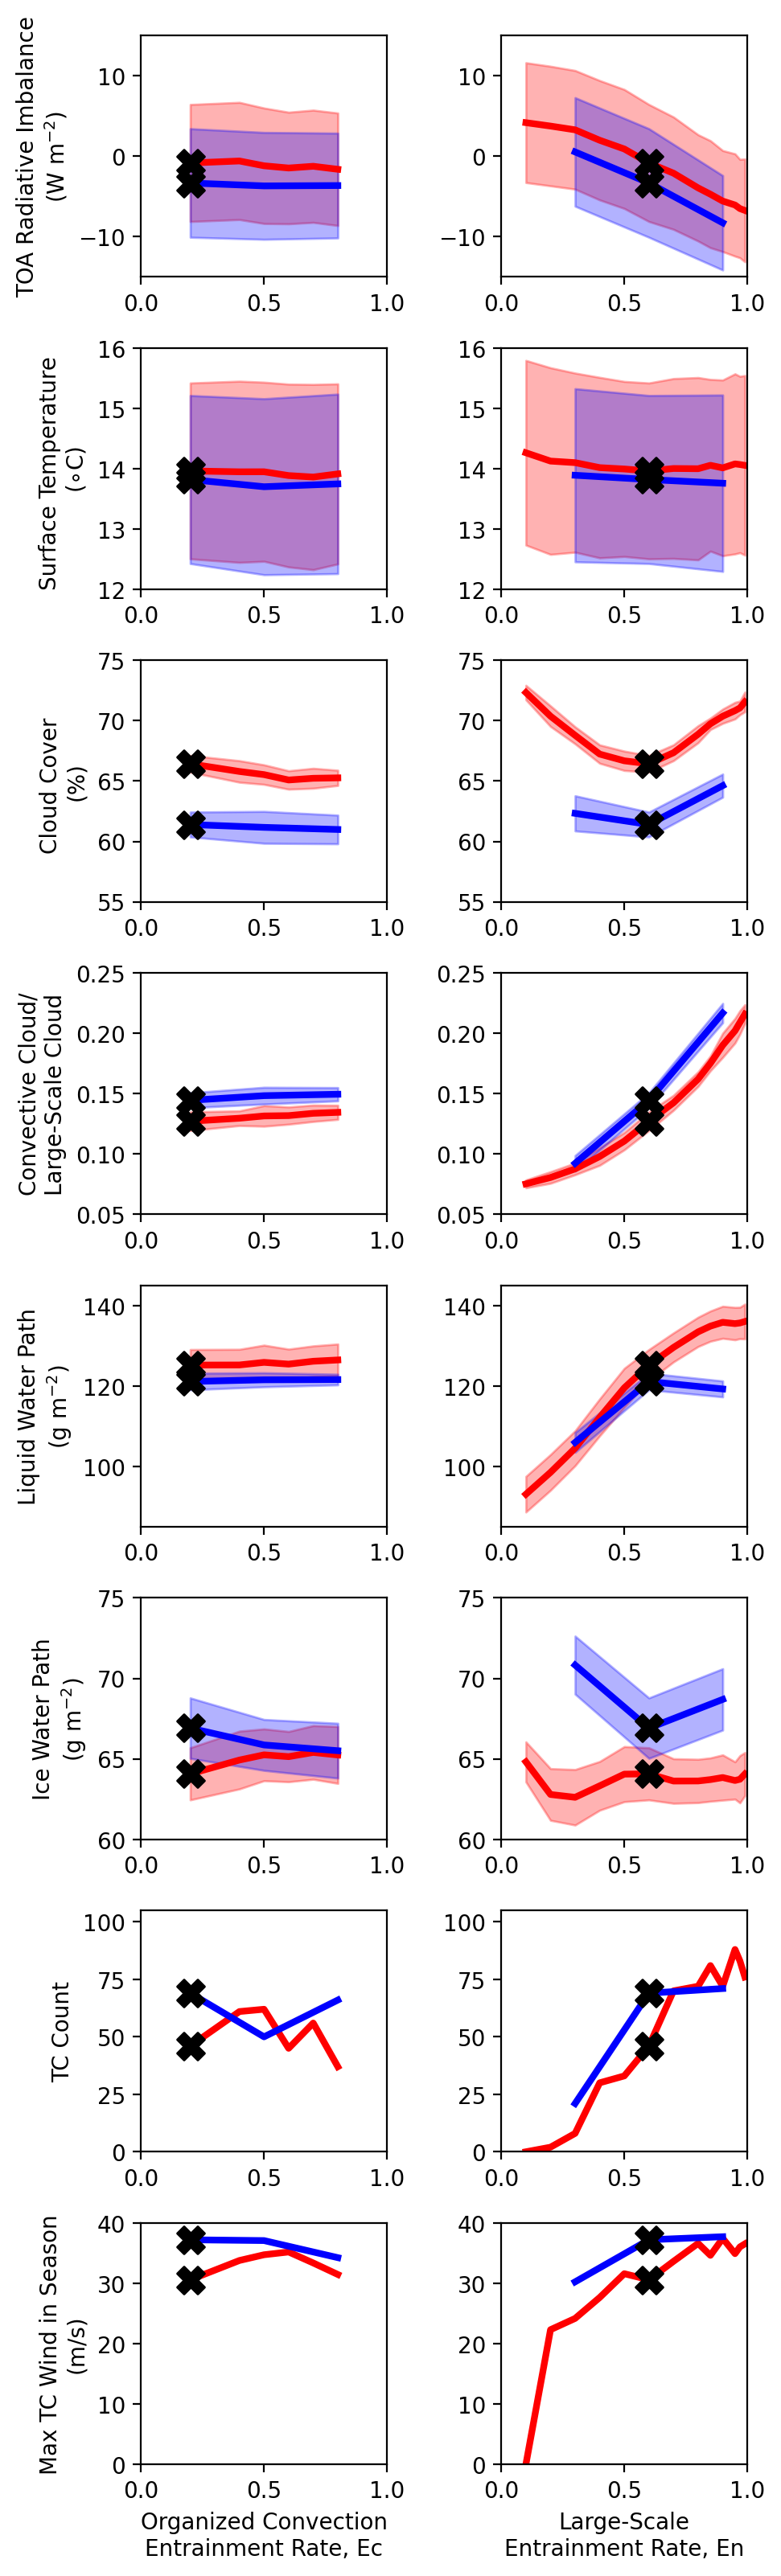

In [46]:
plt.figure(figsize=(5,16), dpi=200)


plt.subplot(8,2,1)
plot_std_default_left(SensTest_v1, 'xaxis_Ec', 'TOA_Dflt_m', 'TOA_Dflt_s', 
                      'TOA_Ec_m', 'TOA_Ec_s', color='r')
plot_default_left(SensTest_v1, 'xaxis_Ec', 'TOA_Dflt_m', 
                  'TOA_Ec_m', 0.2, color='r', color_s='k')
plot_std_default_left(SensTest_v2, 'xaxis_Ec', 'TOA_Dflt_m', 'TOA_Dflt_s', 
                      'TOA_Ec_m', 'TOA_Ec_s', color='b')
plot_default_left(SensTest_v2, 'xaxis_Ec', 'TOA_Dflt_m', 
                  'TOA_Ec_m', 0.2, color='b', color_s='k')
plt.ylabel('TOA Radiative Imbalance\n(W m$^{-2}$)')
plt.axis([0,1,-15,15])


plt.subplot(8,2,2)
plot_std_default_pos_5(SensTest_v1, 'xaxis_En', 'TOA_Dflt_m', 'TOA_Dflt_s', 
                      'TOA_En_m', 'TOA_En_s', color='r')
plot_default_pos_5(SensTest_v1, 'xaxis_En', 'TOA_Dflt_m', 
                  'TOA_En_m', 0.6, color='r', color_s='k')

plot_std_default_middle_3(SensTest_v2, 'xaxis_En', 'TOA_Dflt_m', 'TOA_Dflt_s', 
                      'TOA_En_m', 'TOA_En_s', color='b')
plot_default_middle_3(SensTest_v2, 'xaxis_En', 'TOA_Dflt_m', 
                      'TOA_En_m', 0.6, color='b', color_s='k')
plt.axis([0,1,-15,15])



plt.subplot(8,2,3)
plot_std_default_left(SensTest_v1, 'xaxis_Ec', 'GMST_Dflt_m', 'GMST_Dflt_s', 
                      'GMST_Ec_m', 'GMST_Ec_s', color='r')
plot_default_left(SensTest_v1, 'xaxis_Ec', 'GMST_Dflt_m', 
                  'GMST_Ec_m', 0.2, color='r', color_s='k')
plot_std_default_left(SensTest_v2, 'xaxis_Ec', 'GMST_Dflt_m', 'GMST_Dflt_s', 
                      'GMST_Ec_m', 'GMST_Ec_s', color='b')
plot_default_left(SensTest_v2, 'xaxis_Ec', 'GMST_Dflt_m', 
                  'GMST_Ec_m', 0.2, color='b', color_s='k')
plt.ylabel('Surface Temperature \n($\circ$C)')
plt.axis([0,1,12,16])


plt.subplot(8,2,4)
plot_std_default_pos_5(SensTest_v1, 'xaxis_En', 'GMST_Dflt_m', 'GMST_Dflt_s', 
                      'GMST_En_m', 'GMST_En_s', color='r')
plot_default_pos_5(SensTest_v1, 'xaxis_En', 'GMST_Dflt_m', 
                  'GMST_En_m', 0.6, color='r', color_s='k')

plot_std_default_middle_3(SensTest_v2, 'xaxis_En', 'GMST_Dflt_m', 'GMST_Dflt_s', 
                      'GMST_En_m', 'GMST_En_s', color='b')
plot_default_middle_3(SensTest_v2, 'xaxis_En', 'GMST_Dflt_m', 
                      'GMST_En_m', 0.6, color='b', color_s='k')
plt.axis([0,1,12,16])


plt.subplot(8,2,5)
plot_std_default_left(SensTest_v1, 'xaxis_Ec', 'CLD_Dflt_m', 'CLD_Dflt_s', 
                      'CLD_Ec_m', 'CLD_Ec_s', color='r')
plot_default_left(SensTest_v1, 'xaxis_Ec', 'CLD_Dflt_m', 
                  'CLD_Ec_m', 0.2, color='r', color_s='k')
plot_std_default_left(SensTest_v2, 'xaxis_Ec', 'CLD_Dflt_m', 'CLD_Dflt_s', 
                      'CLD_Ec_m', 'CLD_Ec_s', color='b')
plot_default_left(SensTest_v2, 'xaxis_Ec', 'CLD_Dflt_m', 
                  'CLD_Ec_m', 0.2, color='b', color_s='k')
plt.ylabel('Cloud Cover \n(%)')
plt.axis([0,1,55,75])


plt.subplot(8,2,6)
plot_std_default_pos_5(SensTest_v1, 'xaxis_En', 'CLD_Dflt_m', 'CLD_Dflt_s', 
                      'CLD_En_m', 'CLD_En_s', color='r')
plot_default_pos_5(SensTest_v1, 'xaxis_En', 'CLD_Dflt_m', 
                  'CLD_En_m', 0.6, color='r', color_s='k')

plot_std_default_middle_3(SensTest_v2, 'xaxis_En', 'CLD_Dflt_m', 'CLD_Dflt_s', 
                      'CLD_En_m', 'CLD_En_s', color='b')
plot_default_middle_3(SensTest_v2, 'xaxis_En', 'CLD_Dflt_m', 
                      'CLD_En_m', 0.6, color='b', color_s='k')
plt.axis([0,1,55,75])




plt.subplot(8,2,7)
plot_std_default_left(SensTest_v1, 'xaxis_Ec', 'CLS_Dflt_m', 'CLS_Dflt_s', 
                      'CLS_Ec_m', 'CLS_Ec_s', color='r')
plot_default_left(SensTest_v1, 'xaxis_Ec', 'CLS_Dflt_m', 
                  'CLS_Ec_m', 0.2, color='r', color_s='k')
plot_std_default_left(SensTest_v2, 'xaxis_Ec', 'CLS_Dflt_m', 'CLS_Dflt_s', 
                      'CLS_Ec_m', 'CLS_Ec_s', color='b')
plot_default_left(SensTest_v2, 'xaxis_Ec', 'CLS_Dflt_m', 
                  'CLS_Ec_m', 0.2, color='b', color_s='k')
plt.ylabel('Convective Cloud/\nLarge-Scale Cloud')
plt.axis([0,1,0.05,0.25])


plt.subplot(8,2,8)
plot_std_default_pos_5(SensTest_v1, 'xaxis_En', 'CLS_Dflt_m', 'CLS_Dflt_s', 
                      'CLS_En_m', 'CLS_En_s', color='r')
plot_default_pos_5(SensTest_v1, 'xaxis_En', 'CLS_Dflt_m', 
                  'CLS_En_m', 0.6, color='r', color_s='k')

plot_std_default_middle_3(SensTest_v2, 'xaxis_En', 'CLS_Dflt_m', 'CLS_Dflt_s', 
                      'CLS_En_m', 'CLS_En_s', color='b')
plot_default_middle_3(SensTest_v2, 'xaxis_En', 'CLS_Dflt_m', 
                      'CLS_En_m', 0.6, color='b', color_s='k')
plt.axis([0,1,0.05,0.25])



plt.subplot(8,2,9)
plot_std_default_left(SensTest_v1, 'xaxis_Ec', 'LWP_Dflt_m', 'LWP_Dflt_s', 
                      'LWP_Ec_m', 'LWP_Ec_s', color='r')
plot_default_left(SensTest_v1, 'xaxis_Ec', 'LWP_Dflt_m', 
                  'LWP_Ec_m', 0.2, color='r', color_s='k')
plot_std_default_left(SensTest_v2, 'xaxis_Ec', 'LWP_Dflt_m', 'LWP_Dflt_s', 
                      'LWP_Ec_m', 'LWP_Ec_s', color='b')
plot_default_left(SensTest_v2, 'xaxis_Ec', 'LWP_Dflt_m', 
                  'LWP_Ec_m', 0.2, color='b', color_s='k')
plt.ylabel('Liquid Water Path\n(g m$^{-2}$)')
plt.axis([0,1,85,145])


plt.subplot(8,2,10)
plot_std_default_pos_5(SensTest_v1, 'xaxis_En', 'LWP_Dflt_m', 'LWP_Dflt_s', 
                      'LWP_En_m', 'LWP_En_s', color='r')
plot_default_pos_5(SensTest_v1, 'xaxis_En', 'LWP_Dflt_m', 
                  'LWP_En_m', 0.6, color='r', color_s='k')

plot_std_default_middle_3(SensTest_v2, 'xaxis_En', 'LWP_Dflt_m', 'LWP_Dflt_s', 
                      'LWP_En_m', 'LWP_En_s', color='b')
plot_default_middle_3(SensTest_v2, 'xaxis_En', 'LWP_Dflt_m', 
                      'LWP_En_m', 0.6, color='b', color_s='k')
plt.axis([0,1,85,145])



plt.subplot(8,2,11)
plot_std_default_left(SensTest_v1, 'xaxis_Ec', 'IWP_Dflt_m', 'IWP_Dflt_s', 
                      'IWP_Ec_m', 'IWP_Ec_s', color='r')
plot_default_left(SensTest_v1, 'xaxis_Ec', 'IWP_Dflt_m', 
                  'IWP_Ec_m', 0.2, color='r', color_s='k')
plot_std_default_left(SensTest_v2, 'xaxis_Ec', 'IWP_Dflt_m', 'IWP_Dflt_s', 
                      'IWP_Ec_m', 'IWP_Ec_s', color='b')
plot_default_left(SensTest_v2, 'xaxis_Ec', 'IWP_Dflt_m', 
                  'IWP_Ec_m', 0.2, color='b', color_s='k')
plt.ylabel('Ice Water Path\n(g m$^{-2}$)')
plt.axis([0,1,60,75])


plt.subplot(8,2,12)
plot_std_default_pos_5(SensTest_v1, 'xaxis_En', 'IWP_Dflt_m', 'IWP_Dflt_s', 
                      'IWP_En_m', 'IWP_En_s', color='r')
plot_default_pos_5(SensTest_v1, 'xaxis_En', 'IWP_Dflt_m', 
                  'IWP_En_m', 0.6, color='r', color_s='k')

plot_std_default_middle_3(SensTest_v2, 'xaxis_En', 'IWP_Dflt_m', 'IWP_Dflt_s', 
                      'IWP_En_m', 'IWP_En_s', color='b')
plot_default_middle_3(SensTest_v2, 'xaxis_En', 'IWP_Dflt_m', 
                      'IWP_En_m', 0.6, color='b', color_s='k')
plt.axis([0,1,60,75])


plt.subplot(8,2,13)
plot_default_left(SensTest_v1, 'xaxis_Ec', 'COUNTS_Dflt', 
                  'COUNTS_Ec', 0.2, color='r', color_s='k')
plot_default_left(SensTest_v2, 'xaxis_Ec', 'COUNTS_Dflt', 
                  'COUNTS_Ec', 0.2, color='b', color_s='k')
plt.ylabel('TC Count')
plt.axis([0,1,0,105])


plt.subplot(8,2,14)
plot_default_pos_5(SensTest_v1, 'xaxis_En', 'COUNTS_Dflt', 
                  'COUNTS_En', 0.6, color='r', color_s='k')
plot_default_middle_3(SensTest_v2, 'xaxis_En', 'COUNTS_Dflt', 
                      'COUNTS_En', 0.6, color='b', color_s='k')
plt.axis([0,1,0,105])


plt.subplot(8,2,15)
plot_default_left(SensTest_v1, 'xaxis_Ec', 'WSPD_Dflt', 
                  'WSPD_Ec', 0.2, color='r', color_s='k')
plot_default_left(SensTest_v2, 'xaxis_Ec', 'WSPD_Dflt', 
                  'WSPD_Ec', 0.2, color='b', color_s='k')
plt.ylabel('Max TC Wind in Season\n(m/s)')
plt.xlabel('Organized Convection\nEntrainment Rate, Ec')
plt.axis([0,1,0,40])



plt.subplot(8,2,16)
plot_default_pos_5(SensTest_v1, 'xaxis_En', 'WSPD_Dflt', 
                  'WSPD_En', 0.6, color='r', color_s='k')
plot_default_middle_3(SensTest_v2, 'xaxis_En', 'WSPD_Dflt', 
                      'WSPD_En', 0.6, color='b', color_s='k')
plt.xlabel('Large-Scale\nEntrainment Rate, En')
plt.axis([0,1,0,40])




plt.tight_layout()
plt.savefig('plots/sensitivity_tests_v1_v2_8x2.png')
plt.savefig('plots/sensitivity_tests_v1_v2_8x2.pdf')

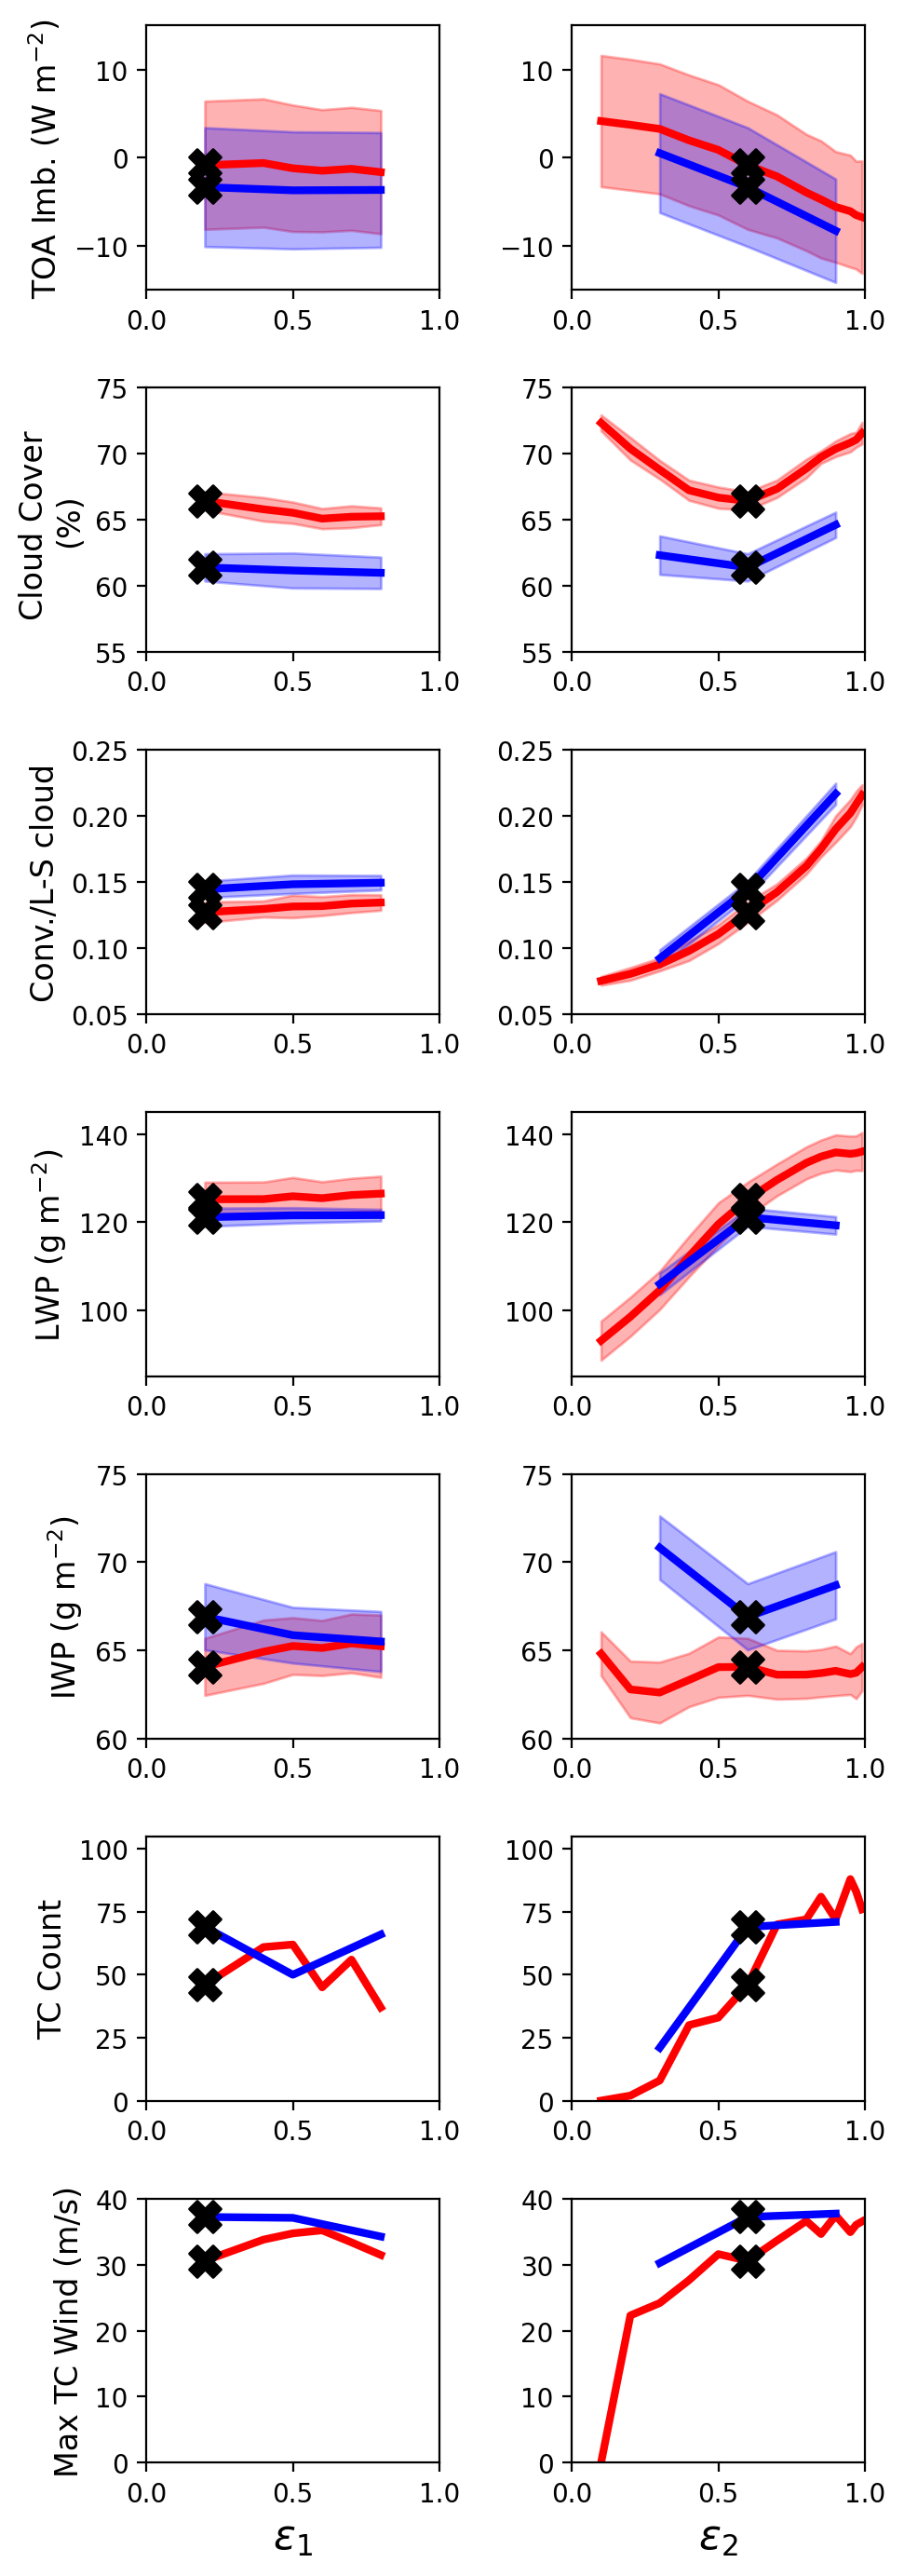

In [38]:
#Similar but without global mean temperature and updated axis labels

plt.figure(figsize=(5,14), dpi=200)


plt.subplot(7,2,1)
plot_std_default_left(SensTest_v1, 'xaxis_Ec', 'TOA_Dflt_m', 'TOA_Dflt_s', 
                      'TOA_Ec_m', 'TOA_Ec_s', color='r')
plot_default_left(SensTest_v1, 'xaxis_Ec', 'TOA_Dflt_m', 
                  'TOA_Ec_m', 0.2, color='r', color_s='k')
plot_std_default_left(SensTest_v2, 'xaxis_Ec', 'TOA_Dflt_m', 'TOA_Dflt_s', 
                      'TOA_Ec_m', 'TOA_Ec_s', color='b')
plot_default_left(SensTest_v2, 'xaxis_Ec', 'TOA_Dflt_m', 
                  'TOA_Ec_m', 0.2, color='b', color_s='k')
plt.ylabel('TOA Imb. (W m$^{-2}$)', fontsize=12)
plt.axis([0,1,-15,15])


plt.subplot(7,2,2)
plot_std_default_pos_5(SensTest_v1, 'xaxis_En', 'TOA_Dflt_m', 'TOA_Dflt_s', 
                      'TOA_En_m', 'TOA_En_s', color='r')
plot_default_pos_5(SensTest_v1, 'xaxis_En', 'TOA_Dflt_m', 
                  'TOA_En_m', 0.6, color='r', color_s='k')

plot_std_default_middle_3(SensTest_v2, 'xaxis_En', 'TOA_Dflt_m', 'TOA_Dflt_s', 
                      'TOA_En_m', 'TOA_En_s', color='b')
plot_default_middle_3(SensTest_v2, 'xaxis_En', 'TOA_Dflt_m', 
                      'TOA_En_m', 0.6, color='b', color_s='k')
plt.axis([0,1,-15,15])



plt.subplot(7,2,3)
plot_std_default_left(SensTest_v1, 'xaxis_Ec', 'CLD_Dflt_m', 'CLD_Dflt_s', 
                      'CLD_Ec_m', 'CLD_Ec_s', color='r')
plot_default_left(SensTest_v1, 'xaxis_Ec', 'CLD_Dflt_m', 
                  'CLD_Ec_m', 0.2, color='r', color_s='k')
plot_std_default_left(SensTest_v2, 'xaxis_Ec', 'CLD_Dflt_m', 'CLD_Dflt_s', 
                      'CLD_Ec_m', 'CLD_Ec_s', color='b')
plot_default_left(SensTest_v2, 'xaxis_Ec', 'CLD_Dflt_m', 
                  'CLD_Ec_m', 0.2, color='b', color_s='k')
plt.ylabel('Cloud Cover \n(%)', fontsize=12)
plt.axis([0,1,55,75])


plt.subplot(7,2,4)
plot_std_default_pos_5(SensTest_v1, 'xaxis_En', 'CLD_Dflt_m', 'CLD_Dflt_s', 
                      'CLD_En_m', 'CLD_En_s', color='r')
plot_default_pos_5(SensTest_v1, 'xaxis_En', 'CLD_Dflt_m', 
                  'CLD_En_m', 0.6, color='r', color_s='k')

plot_std_default_middle_3(SensTest_v2, 'xaxis_En', 'CLD_Dflt_m', 'CLD_Dflt_s', 
                      'CLD_En_m', 'CLD_En_s', color='b')
plot_default_middle_3(SensTest_v2, 'xaxis_En', 'CLD_Dflt_m', 
                      'CLD_En_m', 0.6, color='b', color_s='k')
plt.axis([0,1,55,75])




plt.subplot(7,2,5)
plot_std_default_left(SensTest_v1, 'xaxis_Ec', 'CLS_Dflt_m', 'CLS_Dflt_s', 
                      'CLS_Ec_m', 'CLS_Ec_s', color='r')
plot_default_left(SensTest_v1, 'xaxis_Ec', 'CLS_Dflt_m', 
                  'CLS_Ec_m', 0.2, color='r', color_s='k')
plot_std_default_left(SensTest_v2, 'xaxis_Ec', 'CLS_Dflt_m', 'CLS_Dflt_s', 
                      'CLS_Ec_m', 'CLS_Ec_s', color='b')
plot_default_left(SensTest_v2, 'xaxis_Ec', 'CLS_Dflt_m', 
                  'CLS_Ec_m', 0.2, color='b', color_s='k')
plt.ylabel('Conv./L-S cloud', fontsize=12)
plt.axis([0,1,0.05,0.25])


plt.subplot(7,2,6)
plot_std_default_pos_5(SensTest_v1, 'xaxis_En', 'CLS_Dflt_m', 'CLS_Dflt_s', 
                      'CLS_En_m', 'CLS_En_s', color='r')
plot_default_pos_5(SensTest_v1, 'xaxis_En', 'CLS_Dflt_m', 
                  'CLS_En_m', 0.6, color='r', color_s='k')

plot_std_default_middle_3(SensTest_v2, 'xaxis_En', 'CLS_Dflt_m', 'CLS_Dflt_s', 
                      'CLS_En_m', 'CLS_En_s', color='b')
plot_default_middle_3(SensTest_v2, 'xaxis_En', 'CLS_Dflt_m', 
                      'CLS_En_m', 0.6, color='b', color_s='k')
plt.axis([0,1,0.05,0.25])



plt.subplot(7,2,7)
plot_std_default_left(SensTest_v1, 'xaxis_Ec', 'LWP_Dflt_m', 'LWP_Dflt_s', 
                      'LWP_Ec_m', 'LWP_Ec_s', color='r')
plot_default_left(SensTest_v1, 'xaxis_Ec', 'LWP_Dflt_m', 
                  'LWP_Ec_m', 0.2, color='r', color_s='k')
plot_std_default_left(SensTest_v2, 'xaxis_Ec', 'LWP_Dflt_m', 'LWP_Dflt_s', 
                      'LWP_Ec_m', 'LWP_Ec_s', color='b')
plot_default_left(SensTest_v2, 'xaxis_Ec', 'LWP_Dflt_m', 
                  'LWP_Ec_m', 0.2, color='b', color_s='k')
plt.ylabel('LWP (g m$^{-2}$)', fontsize=12)
plt.axis([0,1,85,145])


plt.subplot(7,2,8)
plot_std_default_pos_5(SensTest_v1, 'xaxis_En', 'LWP_Dflt_m', 'LWP_Dflt_s', 
                      'LWP_En_m', 'LWP_En_s', color='r')
plot_default_pos_5(SensTest_v1, 'xaxis_En', 'LWP_Dflt_m', 
                  'LWP_En_m', 0.6, color='r', color_s='k')

plot_std_default_middle_3(SensTest_v2, 'xaxis_En', 'LWP_Dflt_m', 'LWP_Dflt_s', 
                      'LWP_En_m', 'LWP_En_s', color='b')
plot_default_middle_3(SensTest_v2, 'xaxis_En', 'LWP_Dflt_m', 
                      'LWP_En_m', 0.6, color='b', color_s='k')
plt.axis([0,1,85,145])



plt.subplot(7,2,9)
plot_std_default_left(SensTest_v1, 'xaxis_Ec', 'IWP_Dflt_m', 'IWP_Dflt_s', 
                      'IWP_Ec_m', 'IWP_Ec_s', color='r')
plot_default_left(SensTest_v1, 'xaxis_Ec', 'IWP_Dflt_m', 
                  'IWP_Ec_m', 0.2, color='r', color_s='k')
plot_std_default_left(SensTest_v2, 'xaxis_Ec', 'IWP_Dflt_m', 'IWP_Dflt_s', 
                      'IWP_Ec_m', 'IWP_Ec_s', color='b')
plot_default_left(SensTest_v2, 'xaxis_Ec', 'IWP_Dflt_m', 
                  'IWP_Ec_m', 0.2, color='b', color_s='k')
plt.ylabel('IWP (g m$^{-2}$)', fontsize=12)
plt.axis([0,1,60,75])


plt.subplot(7,2,10)
plot_std_default_pos_5(SensTest_v1, 'xaxis_En', 'IWP_Dflt_m', 'IWP_Dflt_s', 
                      'IWP_En_m', 'IWP_En_s', color='r')
plot_default_pos_5(SensTest_v1, 'xaxis_En', 'IWP_Dflt_m', 
                  'IWP_En_m', 0.6, color='r', color_s='k')

plot_std_default_middle_3(SensTest_v2, 'xaxis_En', 'IWP_Dflt_m', 'IWP_Dflt_s', 
                      'IWP_En_m', 'IWP_En_s', color='b')
plot_default_middle_3(SensTest_v2, 'xaxis_En', 'IWP_Dflt_m', 
                      'IWP_En_m', 0.6, color='b', color_s='k')
plt.axis([0,1,60,75])


plt.subplot(7,2,11)
plot_default_left(SensTest_v1, 'xaxis_Ec', 'COUNTS_Dflt', 
                  'COUNTS_Ec', 0.2, color='r', color_s='k')
plot_default_left(SensTest_v2, 'xaxis_Ec', 'COUNTS_Dflt', 
                  'COUNTS_Ec', 0.2, color='b', color_s='k')
plt.ylabel('TC Count', fontsize=12)
plt.axis([0,1,0,105])


plt.subplot(7,2,12)
plot_default_pos_5(SensTest_v1, 'xaxis_En', 'COUNTS_Dflt', 
                  'COUNTS_En', 0.6, color='r', color_s='k')
plot_default_middle_3(SensTest_v2, 'xaxis_En', 'COUNTS_Dflt', 
                      'COUNTS_En', 0.6, color='b', color_s='k')
plt.axis([0,1,0,105])


plt.subplot(7,2,13)
plot_default_left(SensTest_v1, 'xaxis_Ec', 'WSPD_Dflt', 
                  'WSPD_Ec', 0.2, color='r', color_s='k')
plot_default_left(SensTest_v2, 'xaxis_Ec', 'WSPD_Dflt', 
                  'WSPD_Ec', 0.2, color='b', color_s='k')
plt.ylabel('Max TC Wind (m/s)', fontsize=12)
plt.xlabel('$\epsilon_1$', fontsize=16)
plt.axis([0,1,0,40])



plt.subplot(7,2,14)
plot_default_pos_5(SensTest_v1, 'xaxis_En', 'WSPD_Dflt', 
                  'WSPD_En', 0.6, color='r', color_s='k')
plot_default_middle_3(SensTest_v2, 'xaxis_En', 'WSPD_Dflt', 
                      'WSPD_En', 0.6, color='b', color_s='k')
plt.xlabel('$\epsilon_2$', fontsize=16)
plt.axis([0,1,0,40])




plt.tight_layout()
#plt.savefig('plots/sensitivity_tests_v1_v2_7x2.png')
#plt.savefig('plots/sensitivity_tests_v1_v2_7x2.pdf')

#version with simpler axis labels, bigger
plt.savefig('plots/sensitivity_tests_v1_v2_7x2_simple.png')
plt.savefig('plots/sensitivity_tests_v1_v2_7x2_simple.pdf')

In [36]:

#####   PLOTS: Standard Error   #####


In [37]:
#(Deleting this section, superseded by other scripts that fixed bugs. Accessible from older git commits on local cluster)